In [1]:
# pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # To adjust the ticks formatting
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#### default font sizes to make the figures prettier:



In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
df = pd.read_csv("Covid Data.csv")

In [5]:
df.shape

(1048575, 21)

In [6]:
df.sample(10)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
388798       1             8    2             1  9999-99-99       97   
198016       2             4    1             1  9999-99-99       97   
743400       2            12    2             1  9999-99-99       97   
1007451      2            12    1             1  9999-99-99       97   
1032315      2            12    1             1  9999-99-99       97   
352043       1             6    2             2  9999-99-99        2   
774601       1            12    1             2  9999-99-99        2   
887723       2            12    1             1  9999-99-99       97   
328318       1             4    2             1  9999-99-99       97   
749081       2            12    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
388798           2   51        97        98  ...       2        2   
198016           2   44         2         2  ...       2        2   
743400           2   66        97         1  ...       2        2   
1007451          2   32         2         2  ...       2        2   
1032315          2    0         2         2  ...       2        2   
352043           1   36        97         2  ...       2        2   
774601           2   12         2         2  ...       2        2   
887723           2   53         2         2  ...       2        2   
328318           2   60        97         2  ...       2        2   
749081           2   38        97         2  ...       2        2   

         HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
388798              2              2               2        1              2   
198016              1              2               2        1              2   
743400              2              2               1        2              2   
1007451             2              2               2        2              2   
1032315             2              2               2        2              2   
352043              2              2               2        2              2   
774601              2              2               2        2              2   
887723              2              2               2        2              2   
328318              2              2               2        2              2   
749081              2              2               2        2              2   

         TOBACCO  CLASIFFICATION_FINAL  ICU  
388798         2                     6   97  
198016         2                     6   97  
743400         2                     7   97  
1007451        2                     7   97  
1032315        2                     7   97  
352043         2                     3    2  
774601         2                     7    2  
887723         2                     7   97  
328318         2                     7   97  
749081         2                     7   97  

[10 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

## DATE DIED

In [8]:
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]


In [9]:
df['DEAD'].value_counts()


DEAD
0    971633
1     76942
Name: count, dtype: int64

In [10]:
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [11]:
df['DATE_DIED']


0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570           NaN
1048571           NaN
1048572           NaN
1048573           NaN
1048574           NaN
Name: DATE_DIED, Length: 1048575, dtype: object

In [12]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], format="%d/%m/%Y")


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   USMER                 1048575 non-null  int64         
 1   MEDICAL_UNIT          1048575 non-null  int64         
 2   SEX                   1048575 non-null  int64         
 3   PATIENT_TYPE          1048575 non-null  int64         
 4   DATE_DIED             76942 non-null    datetime64[ns]
 5   INTUBED               1048575 non-null  int64         
 6   PNEUMONIA             1048575 non-null  int64         
 7   AGE                   1048575 non-null  int64         
 8   PREGNANT              1048575 non-null  int64         
 9   DIABETES              1048575 non-null  int64         
 10  COPD                  1048575 non-null  int64         
 11  ASTHMA                1048575 non-null  int64         
 12  INMSUPR               1048575 non-null  in

In [14]:
df['DATE_DIED'].isnull().sum()


971633

**this is not the exact number of null values , values as 97 and 99 are missing data.**


In [15]:
df_null = df.copy()

In [16]:
for i in [97,99]:
    df_null.replace(i , np.nan , inplace=True)

In [17]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                 855869
PNEUMONIA                16003
AGE                        221
PREGNANT                523511
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                     856032
DEAD                         0
dtype: int64

In [18]:
df[df["SEX"]==97]

Empty DataFrame
Columns: [USMER, MEDICAL_UNIT, SEX, PATIENT_TYPE, DATE_DIED, INTUBED, PNEUMONIA, AGE, PREGNANT, DIABETES, COPD, ASTHMA, INMSUPR, HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, RENAL_CHRONIC, TOBACCO, CLASIFFICATION_FINAL, ICU, DEAD]
Index: []

[0 rows x 22 columns]

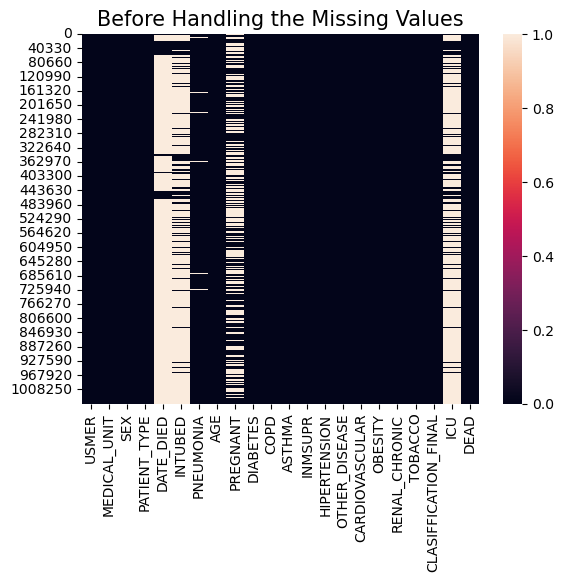

In [19]:
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [20]:
df.duplicated().sum()

812049

In [21]:
print((df.duplicated().sum()/df.shape[0]).round(3)*100,"% duplicated values are present in our data set")

77.4 % duplicated values are present in our data set


### Overview of data

In [22]:
df.describe().round(3).T.drop('count', axis = 1)

mean                  min  \
USMER                                         1.632                  1.0   
MEDICAL_UNIT                                  8.981                  1.0   
SEX                                           1.499                  1.0   
PATIENT_TYPE                                  1.191                  1.0   
DATE_DIED             2020-06-09 16:17:04.480777728  2020-01-02 00:00:00   
INTUBED                                      79.523                  1.0   
PNEUMONIA                                     3.347                  1.0   
AGE                                          41.794                  0.0   
PREGNANT                                     49.766                  1.0   
DIABETES                                      2.186                  1.0   
COPD                                          2.261                  1.0   
ASTHMA                                        2.243                  1.0   
INMSUPR                                       2.298                  1.0   
HIPERTENSION                                  2.129                  1.0   
OTHER_DISEASE                                 2.435                  1.0   
CARDIOVASCULAR                                2.262                  1.0   
OBESITY                                       2.125                  1.0   
RENAL_CHRONIC                                 2.257                  1.0   
TOBACCO                                       2.214                  1.0   
CLASIFFICATION_FINAL                          5.306                  1.0   
ICU                                          79.554                  1.0   
DEAD                                          0.073                  0.0   

                                      25%                  50%  \
USMER                                 1.0                  2.0   
MEDICAL_UNIT                          4.0                 12.0   
SEX                                   1.0                  1.0   
PATIENT_TYPE                          1.0                  1.0   
DATE_DIED             2020-05-18 00:00:00  2020-06-11 00:00:00   
INTUBED                              97.0                 97.0   
PNEUMONIA                             2.0                  2.0   
AGE                                  30.0                 40.0   
PREGNANT                              2.0                 97.0   
DIABETES                              2.0                  2.0   
COPD                                  2.0                  2.0   
ASTHMA                                2.0                  2.0   
INMSUPR                               2.0                  2.0   
HIPERTENSION                          2.0                  2.0   
OTHER_DISEASE                         2.0                  2.0   
CARDIOVASCULAR                        2.0                  2.0   
OBESITY                               2.0                  2.0   
RENAL_CHRONIC                         2.0                  2.0   
TOBACCO                               2.0                  2.0   
CLASIFFICATION_FINAL                  3.0                  6.0   
ICU                                  97.0                 97.0   
DEAD                                  0.0                  0.0   

                                      75%                  max     std  
USMER                                 2.0                  2.0   0.482  
MEDICAL_UNIT                         12.0                 13.0   3.723  
SEX                                   2.0                  2.0     0.5  
PATIENT_TYPE                          1.0                  2.0   0.393  
DATE_DIED             2020-07-04 00:00:00  2021-05-02 00:00:00     NaN  
INTUBED                              97.0                 99.0  36.869  
PNEUMONIA                             2.0                 99.0  11.913  
AGE                                  53.0                121.0  16.907  
PREGNANT                             97.0                 98.0  47.511  
DIABETES                              2.0        

### We can notice that we have major missing values at the following features:
#### 1- "ICU"
#### 2- "INTUBED"
#### 3- "PREGNANT"

#### We ignored those of the "DATE_DIED" feature; as those values aren't actually missing ;D

##  **ICU**: Indicates whether the patient had been admitted to an Intensive Care Unit.


In [23]:
df.ICU.value_counts()

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

In [24]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 -----------------

### From the above we can see that the missing values of (97) are all corresponding to the values of PATIENT_TYPE = 1 which is for non hospitalized patients, while those of (99) are the missing values of the hospitalized patients, which again can not be telled or predicted.

<br>

### So we can replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be admitted to the ICU.

In [25]:
df['ICU'].replace (97, 2, inplace = True)

In [26]:
df.ICU.value_counts()

ICU
2     1024229
1       16858
99       7488
Name: count, dtype: int64

In [27]:
df.INTUBED.value_counts()

INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64

In [28]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be: 

(33656, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be: 

(159050, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be: 


### Again and as predicted it's the same as the ICU case.


### So we can replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be connected to the ventilator.

In [29]:
df['INTUBED'].replace (97, 2, inplace = True)

In [30]:
df.INTUBED.value_counts()

INTUBED
2     1007594
1       33656
99       7325
Name: count, dtype: int64

### So, all the rest of these missing values (values of 98 & 99) can't be predicted (at least for now) as they will affect our analysis, which is based on true and actual real life values.

### In other words, we can't fill them by random using any filling  (imputation) technique.

In [31]:
for i in [98, 99]:
   df.replace(i , np.nan, inplace = True)

In [32]:
df.sample()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE DATE_DIED  INTUBED  PNEUMONIA  \
497879      2            12    2             1       NaT      2.0        2.0   

         AGE  PREGNANT  DIABETES  ...  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
497879  44.0      97.0       2.0  ...      1.0           2.0            2.0   

        CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  \
497879             2.0      2.0            2.0      2.0                     3   

        ICU  DEAD  
497879  2.0     0  

[1 rows x 22 columns]

In [33]:
df.describe().round(3).T.drop('count', axis = 1)

mean                  min  \
USMER                                         1.632                  1.0   
MEDICAL_UNIT                                  8.981                  1.0   
SEX                                           1.499                  1.0   
PATIENT_TYPE                                  1.191                  1.0   
DATE_DIED             2020-06-09 16:17:04.480777728  2020-01-02 00:00:00   
INTUBED                                       1.968                  1.0   
PNEUMONIA                                     1.864                  1.0   
AGE                                          41.783                  0.0   
PREGNANT                                     49.592                  1.0   
DIABETES                                       1.88                  1.0   
COPD                                          1.986                  1.0   
ASTHMA                                         1.97                  1.0   
INMSUPR                                       1.986                  1.0   
HIPERTENSION                                  1.844                  1.0   
OTHER_DISEASE                                 1.973                  1.0   
CARDIOVASCULAR                                 1.98                  1.0   
OBESITY                                       1.847                  1.0   
RENAL_CHRONIC                                 1.982                  1.0   
TOBACCO                                       1.919                  1.0   
CLASIFFICATION_FINAL                          5.306                  1.0   
ICU                                           1.984                  1.0   
DEAD                                          0.073                  0.0   

                                      25%                  50%  \
USMER                                 1.0                  2.0   
MEDICAL_UNIT                          4.0                 12.0   
SEX                                   1.0                  1.0   
PATIENT_TYPE                          1.0                  1.0   
DATE_DIED             2020-05-18 00:00:00  2020-06-11 00:00:00   
INTUBED                               2.0                  2.0   
PNEUMONIA                             2.0                  2.0   
AGE                                  30.0                 40.0   
PREGNANT                              2.0                 97.0   
DIABETES                              2.0                  2.0   
COPD                                  2.0                  2.0   
ASTHMA                                2.0                  2.0   
INMSUPR                               2.0                  2.0   
HIPERTENSION                          2.0                  2.0   
OTHER_DISEASE                         2.0                  2.0   
CARDIOVASCULAR                        2.0                  2.0   
OBESITY                               2.0                  2.0   
RENAL_CHRONIC                         2.0                  2.0   
TOBACCO                               2.0                  2.0   
CLASIFFICATION_FINAL                  3.0                  6.0   
ICU                                   2.0                  2.0   
DEAD                                  0.0                  0.0   

                                      75%                  max     std  
USMER                                 2.0                  2.0   0.482  
MEDICAL_UNIT                         12.0                 13.0   3.723  
SEX                                   2.0                  2.0     0.5  
PATIENT_TYPE                          1.0                  2.0   0.393  
DATE_DIED             2020-07-04 00:00:00  2021-05-02 00:00:00     NaN  
INTUBED                               2.0                  2.0   0.177  
PNEUMONIA                             2.0                  2.0   0.342  
AGE                                  53.0                121.0   16.89  
PREGNANT                             97.0                 97.0  47.508  
DIABETES                              2.0        

#### As we can see most of the patients tend to not having any of the diseases, with very minimal of deaths.

In [34]:
# Let's have a look on our data's different classes:
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -> ", dict(df[i].value_counts()))

USMER  ->  {2: 662903, 1: 385672}
MEDICAL_UNIT  ->  {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX  ->  {1: 525064, 2: 523511}
PATIENT_TYPE  ->  {1: 848544, 2: 200031}
INTUBED  ->  {2.0: 1007594, 1.0: 33656}
PNEUMONIA  ->  {2.0: 892534, 1.0: 140038}
PREGNANT  ->  {97.0: 523511, 2.0: 513179, 1.0: 8131}
DIABETES  ->  {2.0: 920248, 1.0: 124989}
COPD  ->  {2.0: 1030510, 1.0: 15062}
ASTHMA  ->  {2.0: 1014024, 1.0: 31572}
INMSUPR  ->  {2.0: 1031001, 1.0: 14170}
HIPERTENSION  ->  {2.0: 882742, 1.0: 162729}
OTHER_DISEASE  ->  {2.0: 1015490, 1.0: 28040}
CARDIOVASCULAR  ->  {2.0: 1024730, 1.0: 20769}
OBESITY  ->  {2.0: 885727, 1.0: 159816}
RENAL_CHRONIC  ->  {2.0: 1026665, 1.0: 18904}
TOBACCO  ->  {2.0: 960979, 1.0: 84376}
CLASIFFICATION_FINAL  ->  {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU  ->  {2.0: 1024229, 1.0: 16858}
DEAD  ->  {0: 971633, 1: 76942}


# EDA

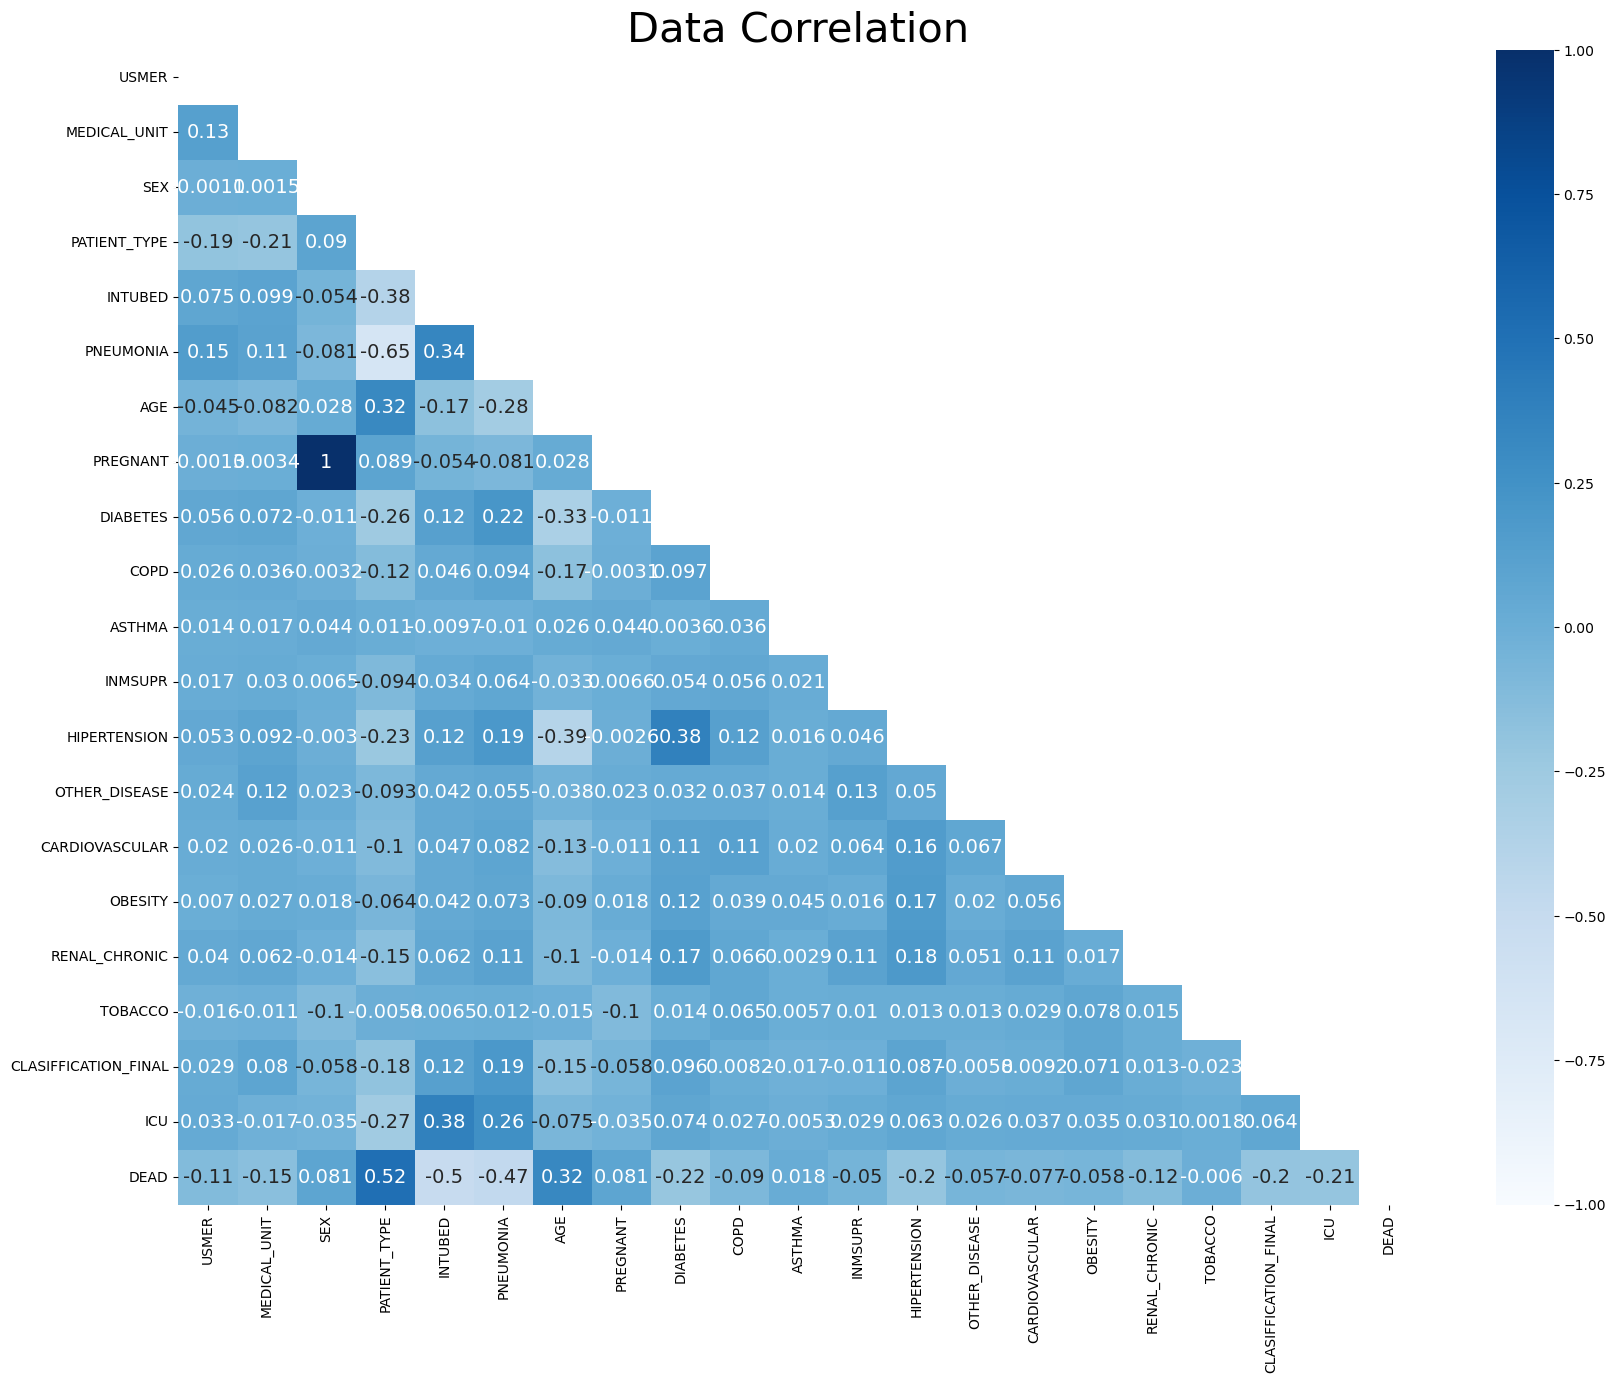

In [35]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['DATE_DIED']).corr()))
sns.heatmap(df.drop(columns=['DATE_DIED']).corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

As colors go darker that indicates positive correlation, and as they go lighter that indicates negative correlation.
Also as the darkness or the lightness increases that indicates the increasing of the strength of the corresponding correlation.

In [36]:
# Let's first create a new DataFrame for medical conditions only:
df_med = df.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
                          'INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
df_med

PNEUMONIA  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0              1.0       2.0       2.0   2.0     2.0      2.0           1.0   
1              1.0      97.0       2.0   2.0     2.0      2.0           1.0   
2              2.0      97.0       1.0   2.0     2.0      2.0           2.0   
3              2.0       2.0       2.0   2.0     2.0      2.0           2.0   
4              2.0      97.0       1.0   2.0     2.0      2.0           1.0   
...            ...       ...       ...   ...     ...      ...           ...   
1048570        2.0      97.0       2.0   2.0     2.0      2.0           2.0   
1048571        2.0      97.0       2.0   2.0     2.0      2.0           1.0   
1048572        2.0      97.0       2.0   2.0     2.0      2.0           2.0   
1048573        2.0      97.0       2.0   2.0     2.0      2.0           2.0   
1048574        2.0      97.0       2.0   2.0     2.0      2.0           2.0   

         OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  DEAD  
0                  2.0             2.0      2.0            2.0      2.0     1  
1                  2.0             2.0      1.0            1.0      2.0     1  
2                  2.0             2.0      2.0            2.0      2.0     1  
3                  2.0             2.0      2.0            2.0      2.0     1  
4                  2.0             2.0      2.0            2.0      2.0     1  
...                ...             ...      ...            ...      ...   ...  
1048570            2.0             2.0      2.0            2.0      2.0     0  
1048571            2.0             2.0      2.0            2.0      2.0     0  
1048572            2.0             2.0      2.0            2.0      2.0     0  
1048573            2.0             2.0      2.0            2.0      2.0     0  
1048574            2.0             2.0      2.0            2.0      2.0     0  

[1048575 rows x 13 columns]

In [37]:
df_med.duplicated(keep = False).sum()

1045730

### We can see that there are 1,046,683 patients with similar conditions split into some groups of patients with the same conditions

# 1- How many people have died?¶


In [38]:
dict(df['DEAD'].value_counts())[1]


76942

Text(0, 0.5, 'Count')

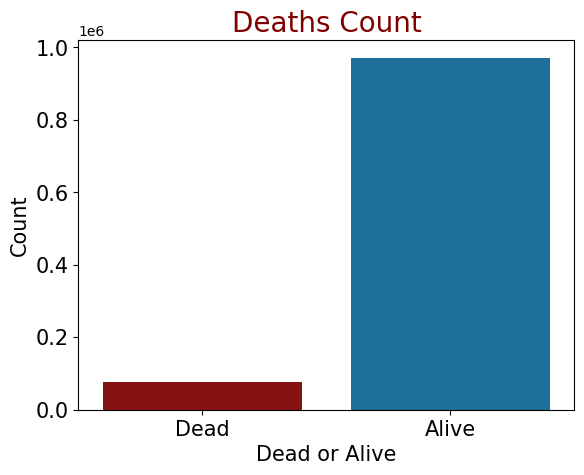

In [39]:
D = df['DEAD']
D = D.replace(1, "Dead")
D = D.replace(0, "Alive")
fig, ax = plt.subplots()
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Deaths Count', color = '#800000', fontsize = 20)
sns.countplot(x=D, palette = ['#990000',"#0a75ad"])
plt.xlabel("Dead or Alive", fontsize=15)
plt.ylabel("Count", fontsize=15)

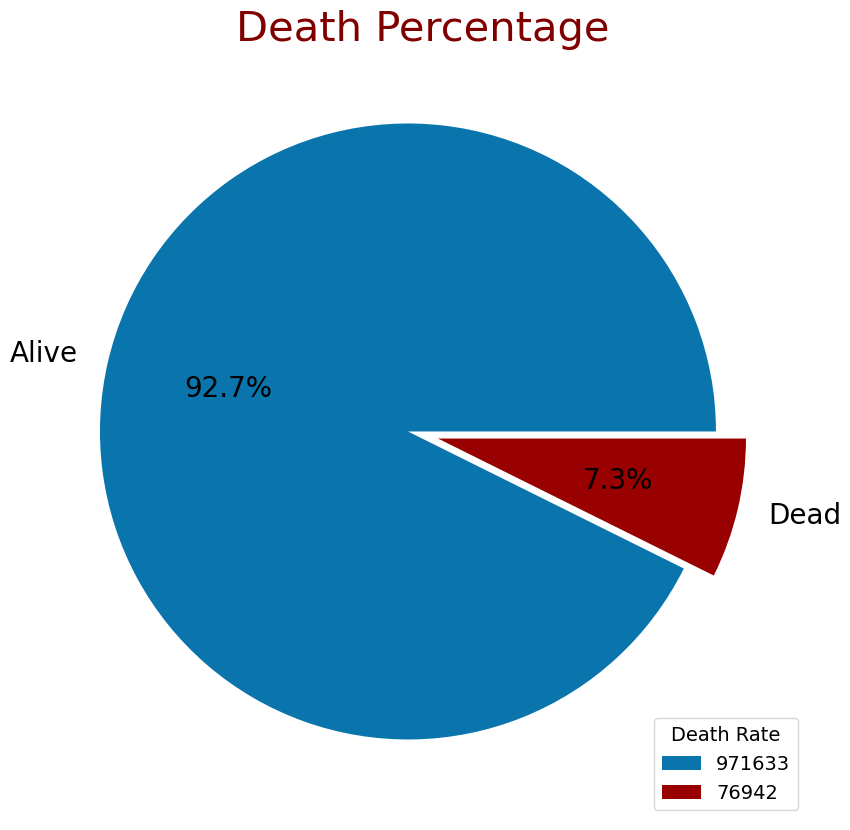

In [40]:
labels = ["Alive", "Dead"]
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

We can see that 76,942 patients have died representing 7.3% of the total number of patients in our dataset.¶


# 2- And, did they all have the same results?


In [41]:
df_dead = df[df["DEAD"] == 1]
df_dead

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  \
0            2             1    1             1 2020-05-03      2.0   
1            2             1    2             1 2020-06-03      2.0   
2            2             1    2             2 2020-06-09      1.0   
3            2             1    1             1 2020-06-12      2.0   
4            2             1    2             1 2020-06-21      2.0   
...        ...           ...  ...           ...        ...      ...   
1047635      1            13    2             2 2020-07-18      1.0   
1047636      1            13    2             1 2020-07-26      2.0   
1047637      1            13    1             1 2020-07-27      2.0   
1047638      1            13    2             2 2020-07-29      1.0   
1047639      1            13    2             2 2020-07-29      2.0   

         PNEUMONIA   AGE  PREGNANT  DIABETES  ...  INMSUPR  HIPERTENSION  \
0              1.0  65.0       2.0       2.0  ...      2.0           1.0   
1              1.0  72.0      97.0       2.0  ...      2.0           1.0   
2              2.0  55.0      97.0       1.0  ...      2.0           2.0   
3              2.0  53.0       2.0       2.0  ...      2.0           2.0   
4              2.0  68.0      97.0       1.0  ...      2.0           1.0   
...            ...   ...       ...       ...  ...      ...           ...   
1047635        1.0  73.0      97.0       2.0  ...      2.0           1.0   
1047636        1.0  82.0      97.0       2.0  ...      2.0           1.0   
1047637        1.0  82.0       2.0       2.0  ...      2.0           2.0   
1047638        1.0  80.0      97.0       2.0  ...      2.0           2.0   
1047639        1.0  61.0      97.0       1.0  ...      2.0           1.0   

         OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0                  2.0             2.0      2.0            2.0      2.0   
1                  2.0             2.0      1.0            1.0      2.0   
2                  2.0             2.0      2.0            2.0      2.0   
3                  2.0             2.0      2.0            2.0      2.0   
4                  2.0             2.0      2.0            2.0      2.0   
...                ...             ...      ...            ...      ...   
1047635            2.0             2.0      1.0            2.0      2.0   
1047636            2.0             2.0      2.0            2.0      2.0   
1047637            2.0             2.0      2.0            2.0      2.0   
1047638            2.0             2.0      1.0            2.0      2.0   
1047639            2.0             2.0      2.0            1.0      1.0   

         CLASIFFICATION_FINAL  ICU  DEAD  
0                           3  2.0     1  
1                           5  2.0     1  
2                           3  2.0     1  
3                           7  2.0     1  
4                           3  2.0     1  
...                       ...  ...   ...  
1047635                     3  2.0     1  
1047636                     3  2.0     1  
1047637                     3  2.0     1  
1047638                     3  2.0     1  
1047639                     7  2.0     1  

[76942 rows x 22 columns]

In [42]:
df_dead["CLASIFFICATION_FINAL"].value_counts()


CLASIFFICATION_FINAL
3    51430
7    13695
6     7652
2     1851
5     1211
1      955
4      148
Name: count, dtype: int64

We can see that we have dead patients with all "Classification" values starting from 1 till we go to 7, meaning we have dead people who were not diagnosed with Covid 19, and hence we can say that the dead patients didn't have the same results with a majority of whom were being diagnosed with Covid 19.

# 3- What is the percentage of Covid carriers among those dead patients?


In [43]:
def Covid_or_Not(val):
    if val >= 4:
        return "Not a Covid 19 Carrier"
    else:
        return "A Covid 19 Carrier"


In [44]:
df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)


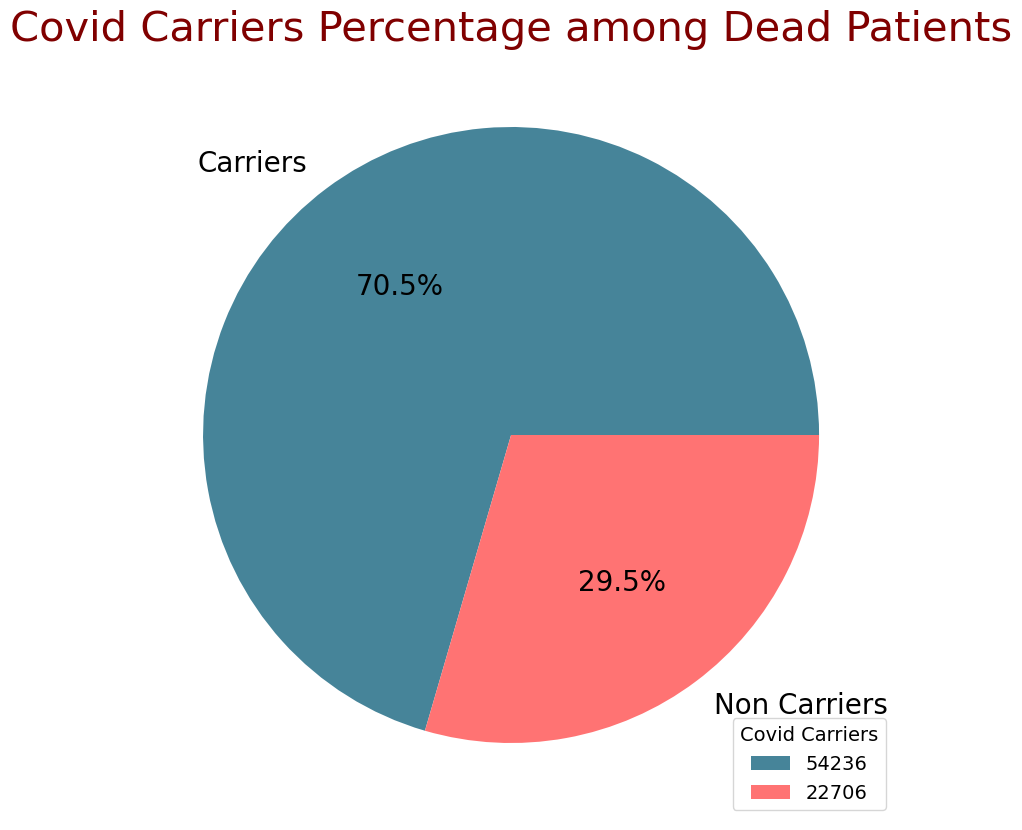

In [45]:
labels = ["Carriers", "Non Carriers"]
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among Dead Patients', color = 'Maroon', fontsize = 30)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [46]:
df_dead["Covid_or_Not"].value_counts()


Covid_or_Not
A Covid 19 Carrier        54236
Not a Covid 19 Carrier    22706
Name: count, dtype: int64

We can see that there are 54,236 patients who were carriers of Covid 19 among the dead with a percentage of 70.5%.
That indicates the horrifying effect of the pandemic on the death rates back then!!`m

In [47]:
df_dead


USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  \
0            2             1    1             1 2020-05-03      2.0   
1            2             1    2             1 2020-06-03      2.0   
2            2             1    2             2 2020-06-09      1.0   
3            2             1    1             1 2020-06-12      2.0   
4            2             1    2             1 2020-06-21      2.0   
...        ...           ...  ...           ...        ...      ...   
1047635      1            13    2             2 2020-07-18      1.0   
1047636      1            13    2             1 2020-07-26      2.0   
1047637      1            13    1             1 2020-07-27      2.0   
1047638      1            13    2             2 2020-07-29      1.0   
1047639      1            13    2             2 2020-07-29      2.0   

         PNEUMONIA   AGE  PREGNANT  DIABETES  ...  HIPERTENSION  \
0              1.0  65.0       2.0       2.0  ...           1.0   
1              1.0  72.0      97.0       2.0  ...           1.0   
2              2.0  55.0      97.0       1.0  ...           2.0   
3              2.0  53.0       2.0       2.0  ...           2.0   
4              2.0  68.0      97.0       1.0  ...           1.0   
...            ...   ...       ...       ...  ...           ...   
1047635        1.0  73.0      97.0       2.0  ...           1.0   
1047636        1.0  82.0      97.0       2.0  ...           1.0   
1047637        1.0  82.0       2.0       2.0  ...           2.0   
1047638        1.0  80.0      97.0       2.0  ...           2.0   
1047639        1.0  61.0      97.0       1.0  ...           1.0   

         OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0                  2.0             2.0      2.0            2.0      2.0   
1                  2.0             2.0      1.0            1.0      2.0   
2                  2.0             2.0      2.0            2.0      2.0   
3                  2.0             2.0      2.0            2.0      2.0   
4                  2.0             2.0      2.0            2.0      2.0   
...                ...             ...      ...            ...      ...   
1047635            2.0             2.0      1.0            2.0      2.0   
1047636            2.0             2.0      2.0            2.0      2.0   
1047637            2.0             2.0      2.0            2.0      2.0   
1047638            2.0             2.0      1.0            2.0      2.0   
1047639            2.0             2.0      2.0            1.0      1.0   

         CLASIFFICATION_FINAL  ICU  DEAD            Covid_or_Not  
0                           3  2.0     1      A Covid 19 Carrier  
1                           5  2.0     1  Not a Covid 19 Carrier  
2                           3  2.0     1      A Covid 19 Carrier  
3                           7  2.0     1  Not a Covid 19 Carrier  
4                           3  2.0     1      A Covid 19 Carrier  
...                       ...  ...   ...                     ...  
1047635                     3  2.0     1      A Covid 19 Carrier  
1047636                     3  2.0     1      A Covid 19 Carrier  
1047637                     3  2.0     1      A Covid 19 Carrier  
1047638                     3  2.0     1      A Covid 19 Carrier  
1047639                     7  2.0     1  Not a Covid 19 Carrier  

[76942 rows x 23 columns]

# 4- What about the percentage of Covid carriers among all the patients?

In [48]:
df['Covid_or_Not'] = df["CLASIFFICATION_FINAL"].apply(Covid_or_Not)


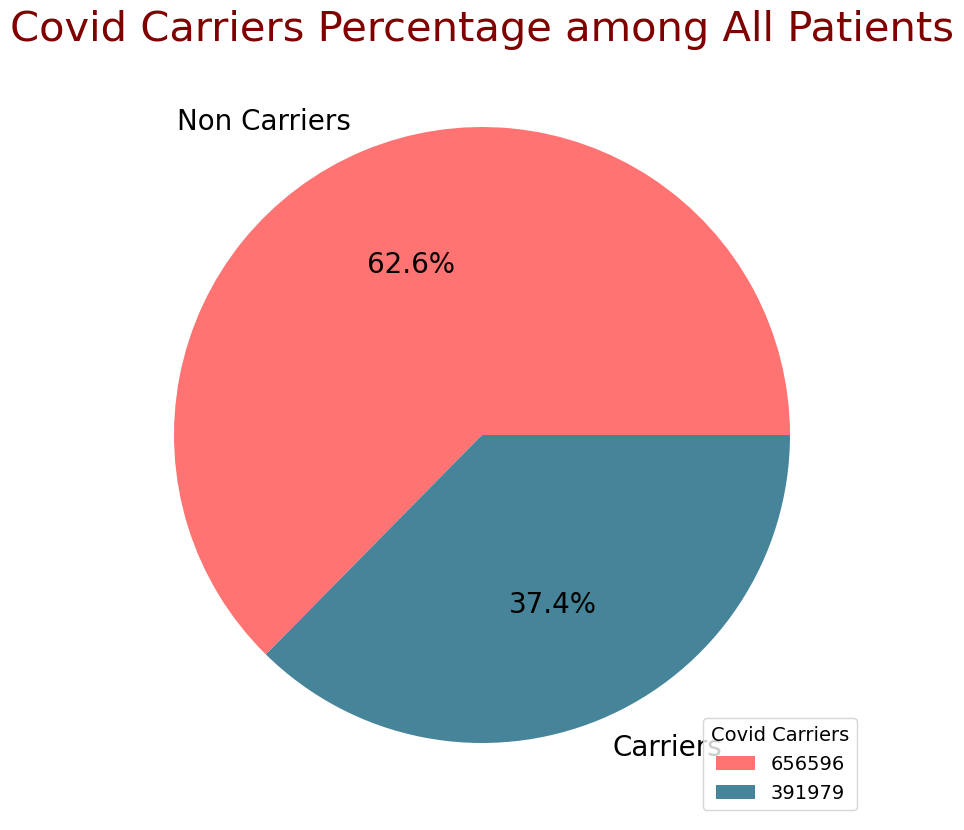

In [49]:
labels = ["Non Carriers", "Carriers"]
sizes = df['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among All Patients', color = 'Maroon', fontsize = 30)
plt.legend(df['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()


In [50]:
df["Covid_or_Not"]

0              A Covid 19 Carrier
1          Not a Covid 19 Carrier
2              A Covid 19 Carrier
3          Not a Covid 19 Carrier
4              A Covid 19 Carrier
                    ...          
1048570    Not a Covid 19 Carrier
1048571    Not a Covid 19 Carrier
1048572    Not a Covid 19 Carrier
1048573    Not a Covid 19 Carrier
1048574    Not a Covid 19 Carrier
Name: Covid_or_Not, Length: 1048575, dtype: object

In [51]:
df["Covid_or_Not"].value_counts()


Covid_or_Not
Not a Covid 19 Carrier    656596
A Covid 19 Carrier        391979
Name: count, dtype: int64

We can see that there are 391,979 patients who were carriers of Covid 19 among all patients with a percentage of 37.4%.
That indicates that the majority of the patients were non carriers of Covid 19.

# 5- What is the percentage of death among those carriers?

In [52]:
Covid_deaths = df[(df['Covid_or_Not'] == "A Covid 19 Carrier")]

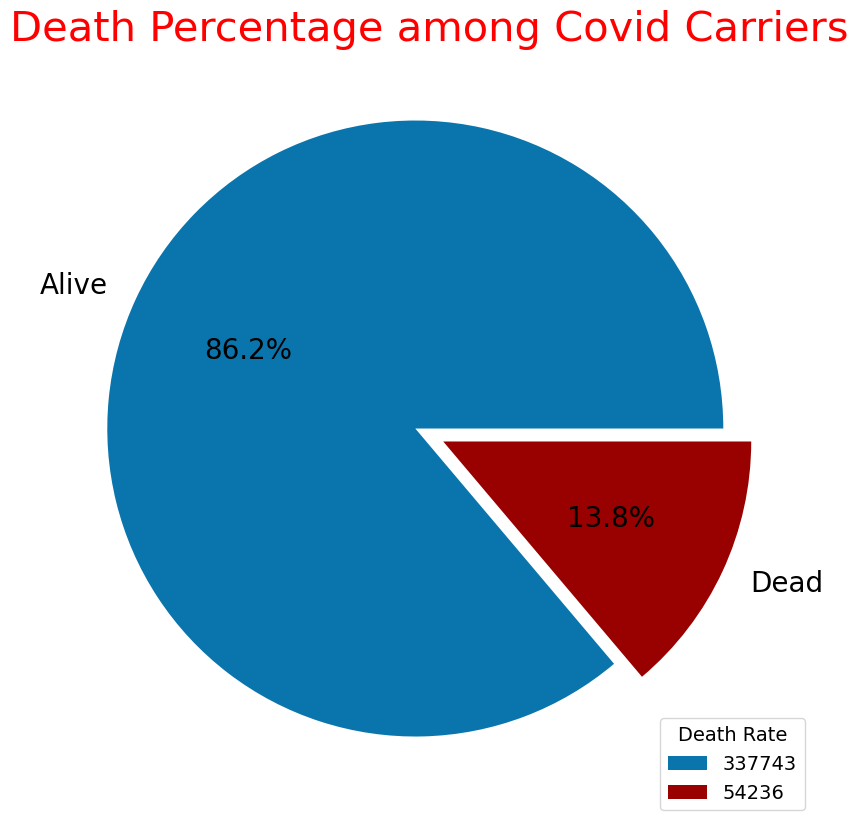

In [53]:
labels = ["Alive", "Dead"]
sizes = Covid_deaths['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers',color = 'red',fontsize = 30)
plt.legend(Covid_deaths['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

Here we can see that the 54,236 patients with Covid 19 who have died, reperesented only 13.8% of all the carriers, which means that 86.2% were treated successfully, and the treatment was going well to a certain degree back then accros the world.¶

# 6- Is it true that age has some impact?


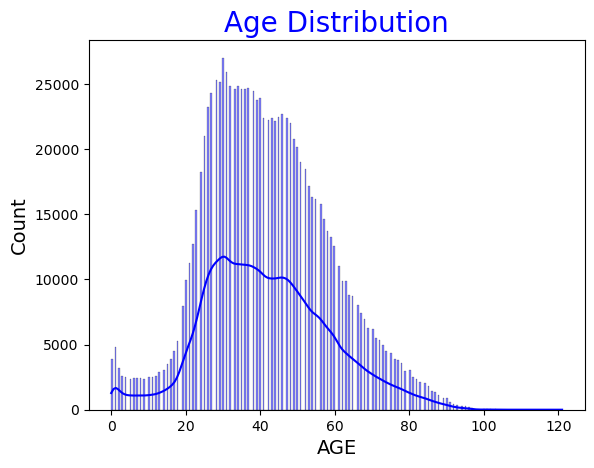

In [54]:
# Let's first check our age distribution
sns.histplot(x=df.AGE, kde = True, color = "blue")
plt.title('Age Distribution', color = 'blue', fontsize = 20)
plt.show()


We notice that the majoriy are of people in their 20s up to late 50s

# 7- Does obesity has an impact?

In [55]:
df_mod = df.copy()


In [56]:
df_mod['OBESITY'] = ["Obese" if i==1 else "Not Obese" for i in df.OBESITY]

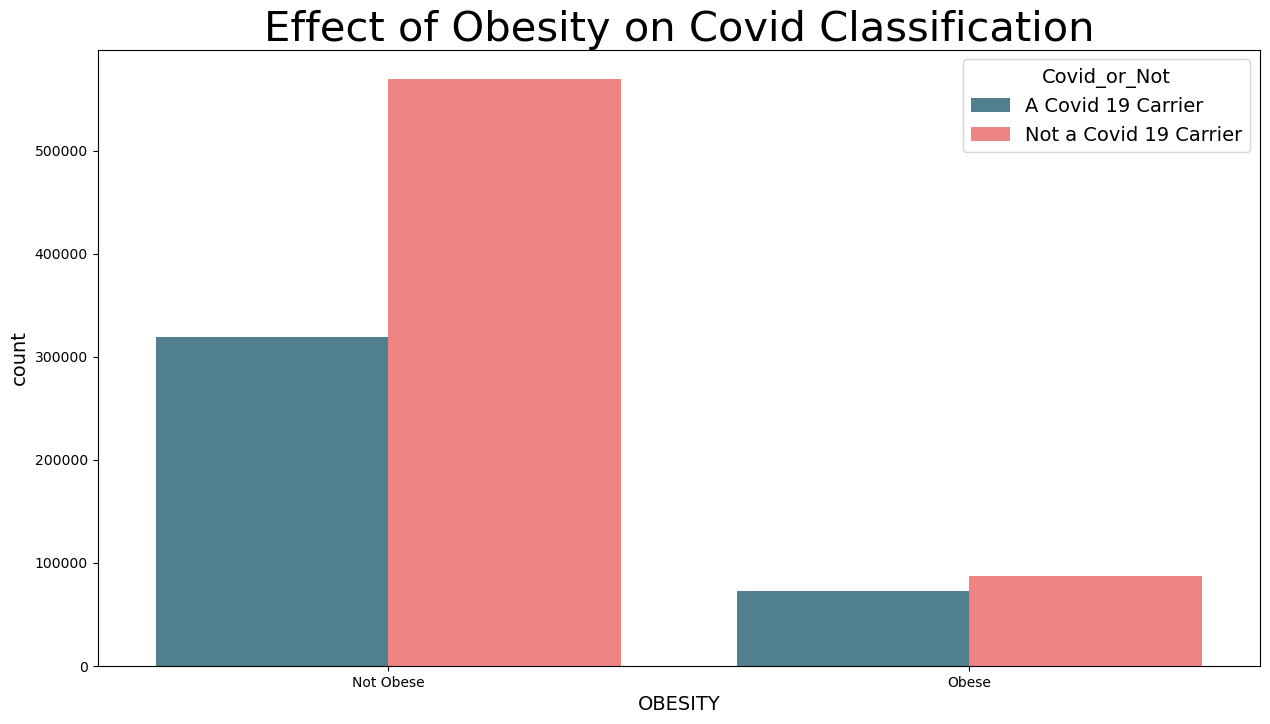

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="OBESITY", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Obesity on Covid Classification', color = 'black', fontsize = 30)
plt.show()


We can see that for patients with obesity the ratio is so close although they are considered a minority; but that gives us the indication that the percentage of patients carrying the disease among them is pretty high, while for patients who don't suffer from obesity the ratio is about 1:2, meaning that for every 100 patients who are not suffering from obesity there is a chance for only half of them to carry Covid.
So according to our analysis, people who are suffering form obesity are more likely to carry Covid.

# 8- Does gender has any impact?

In [58]:
df_mod['SEX'] = ["Female" if i==1 else "Male" for i in df.SEX]


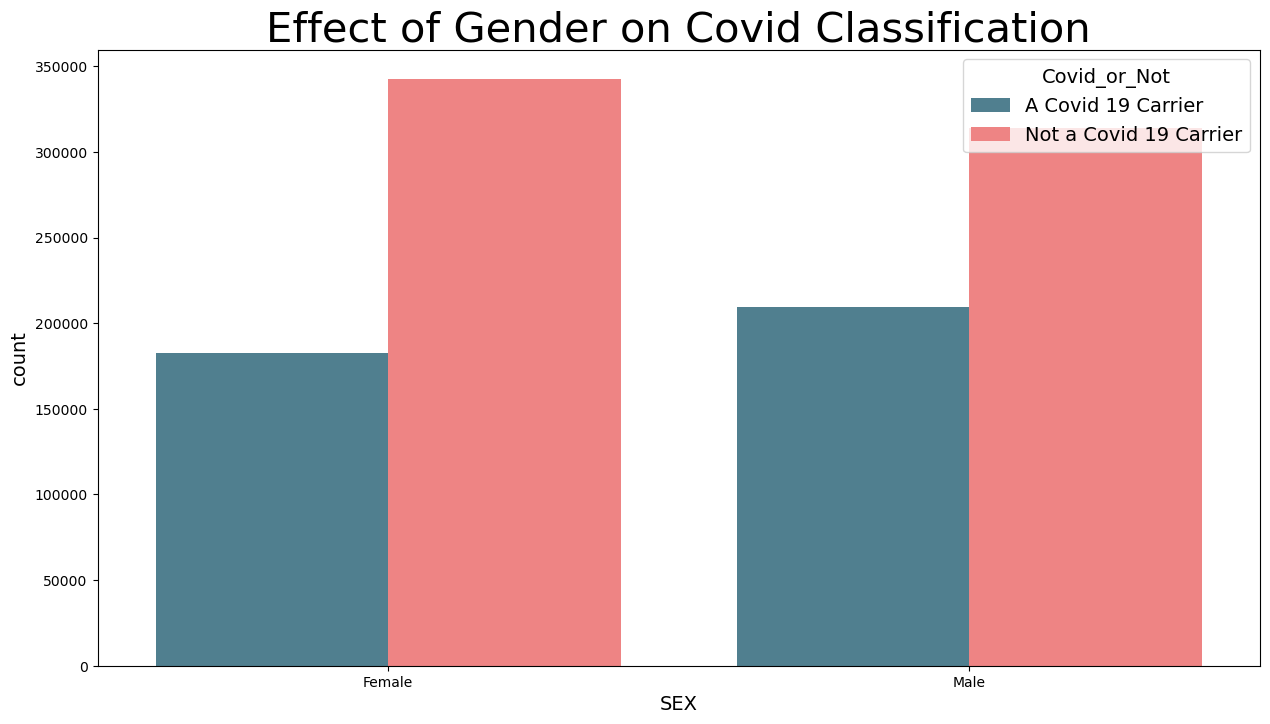

In [59]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="SEX", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()


We can see that gender has no effect or impact, with males being slightly more likely to carry Covid than females but the difference doesn't really matter.¶


# 9- Does pregnancy has any impact?


In [60]:
df_preg = df[df["SEX"] == 1]
df_preg["PREGNANT"].value_counts()


PREGNANT
2.0    513179
1.0      8131
Name: count, dtype: int64

In [61]:
df_preg['PREGNANT'] = ["Pregnant" if i==1 else "Non Pregnant" for i in df_preg.PREGNANT]


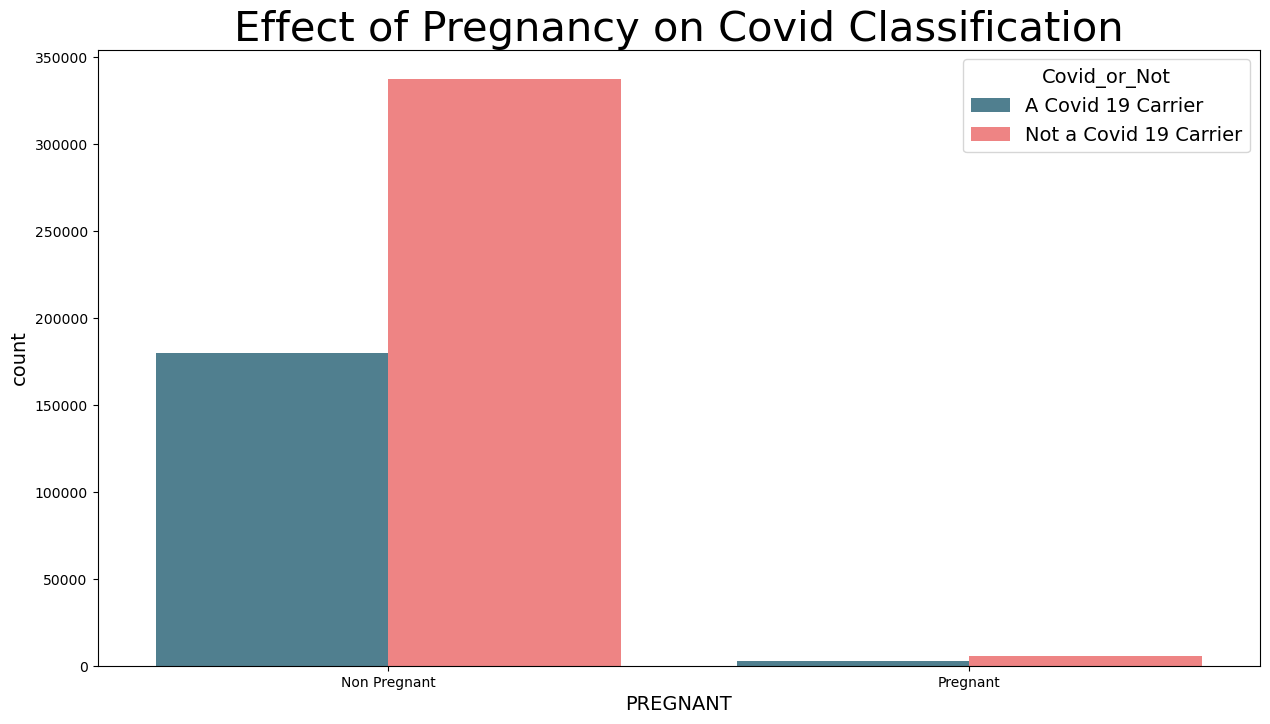

In [62]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_preg, x="PREGNANT", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Pregnancy on Covid Classification', color = 'black', fontsize = 30)
plt.show()


We can not determine from the above chart; as the pregnant ratio is not visible, during the low amount of pregnant females across our data.

In [63]:
df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()


Covid_or_Not
Not a Covid 19 Carrier    5377
A Covid 19 Carrier        2754
Name: count, dtype: int64

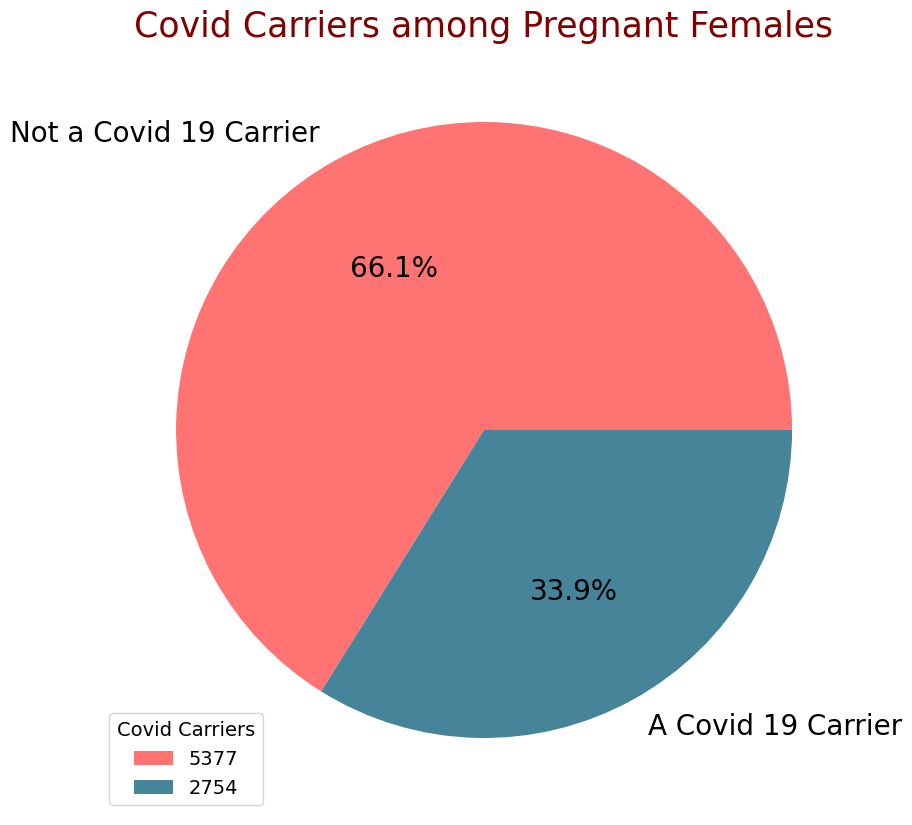

In [64]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [65]:
df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts()


Covid_or_Not
Not a Covid 19 Carrier    337197
A Covid 19 Carrier        179736
Name: count, dtype: int64

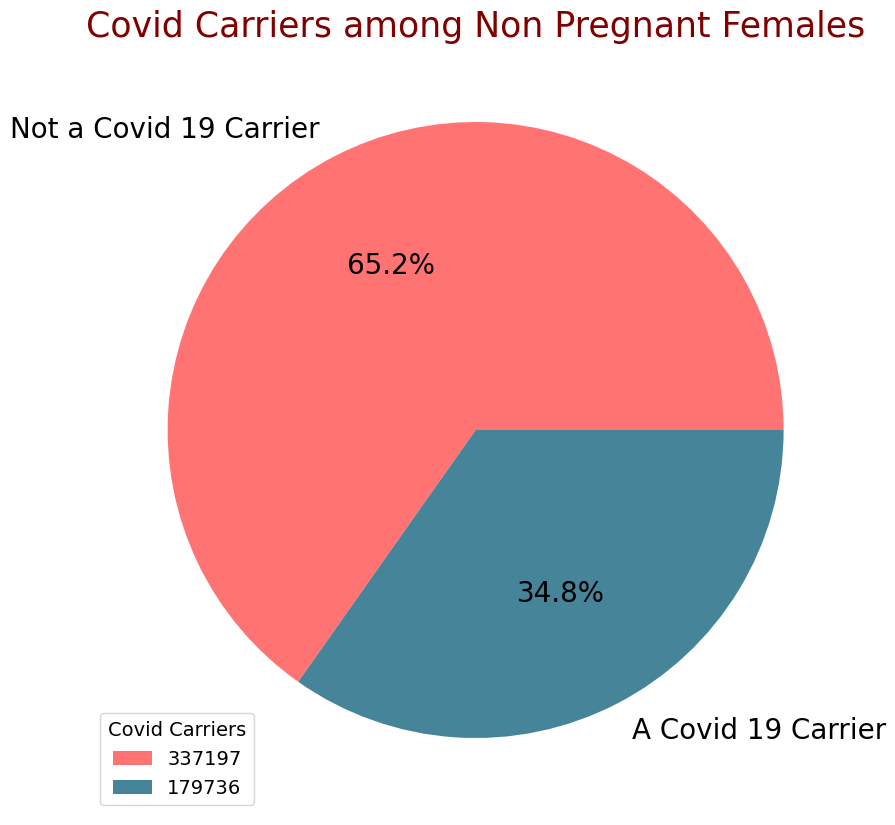

In [66]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Non Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Non Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

From the above two charts, we can see that both percentages are pretty much close.
So based on our analysis here, we can not see any impact from pregnancy on Covid classification.

# 10- Do other diseases affect the patient classification?

In [67]:
df_med


PNEUMONIA  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0              1.0       2.0       2.0   2.0     2.0      2.0           1.0   
1              1.0      97.0       2.0   2.0     2.0      2.0           1.0   
2              2.0      97.0       1.0   2.0     2.0      2.0           2.0   
3              2.0       2.0       2.0   2.0     2.0      2.0           2.0   
4              2.0      97.0       1.0   2.0     2.0      2.0           1.0   
...            ...       ...       ...   ...     ...      ...           ...   
1048570        2.0      97.0       2.0   2.0     2.0      2.0           2.0   
1048571        2.0      97.0       2.0   2.0     2.0      2.0           1.0   
1048572        2.0      97.0       2.0   2.0     2.0      2.0           2.0   
1048573        2.0      97.0       2.0   2.0     2.0      2.0           2.0   
1048574        2.0      97.0       2.0   2.0     2.0      2.0           2.0   

         OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  DEAD  
0                  2.0             2.0      2.0            2.0      2.0     1  
1                  2.0             2.0      1.0            1.0      2.0     1  
2                  2.0             2.0      2.0            2.0      2.0     1  
3                  2.0             2.0      2.0            2.0      2.0     1  
4                  2.0             2.0      2.0            2.0      2.0     1  
...                ...             ...      ...            ...      ...   ...  
1048570            2.0             2.0      2.0            2.0      2.0     0  
1048571            2.0             2.0      2.0            2.0      2.0     0  
1048572            2.0             2.0      2.0            2.0      2.0     0  
1048573            2.0             2.0      2.0            2.0      2.0     0  
1048574            2.0             2.0      2.0            2.0      2.0     0  

[1048575 rows x 13 columns]

In [68]:
df_diseases = df_med.drop(columns = ["PREGNANT", "OBESITY", 'DEAD'])


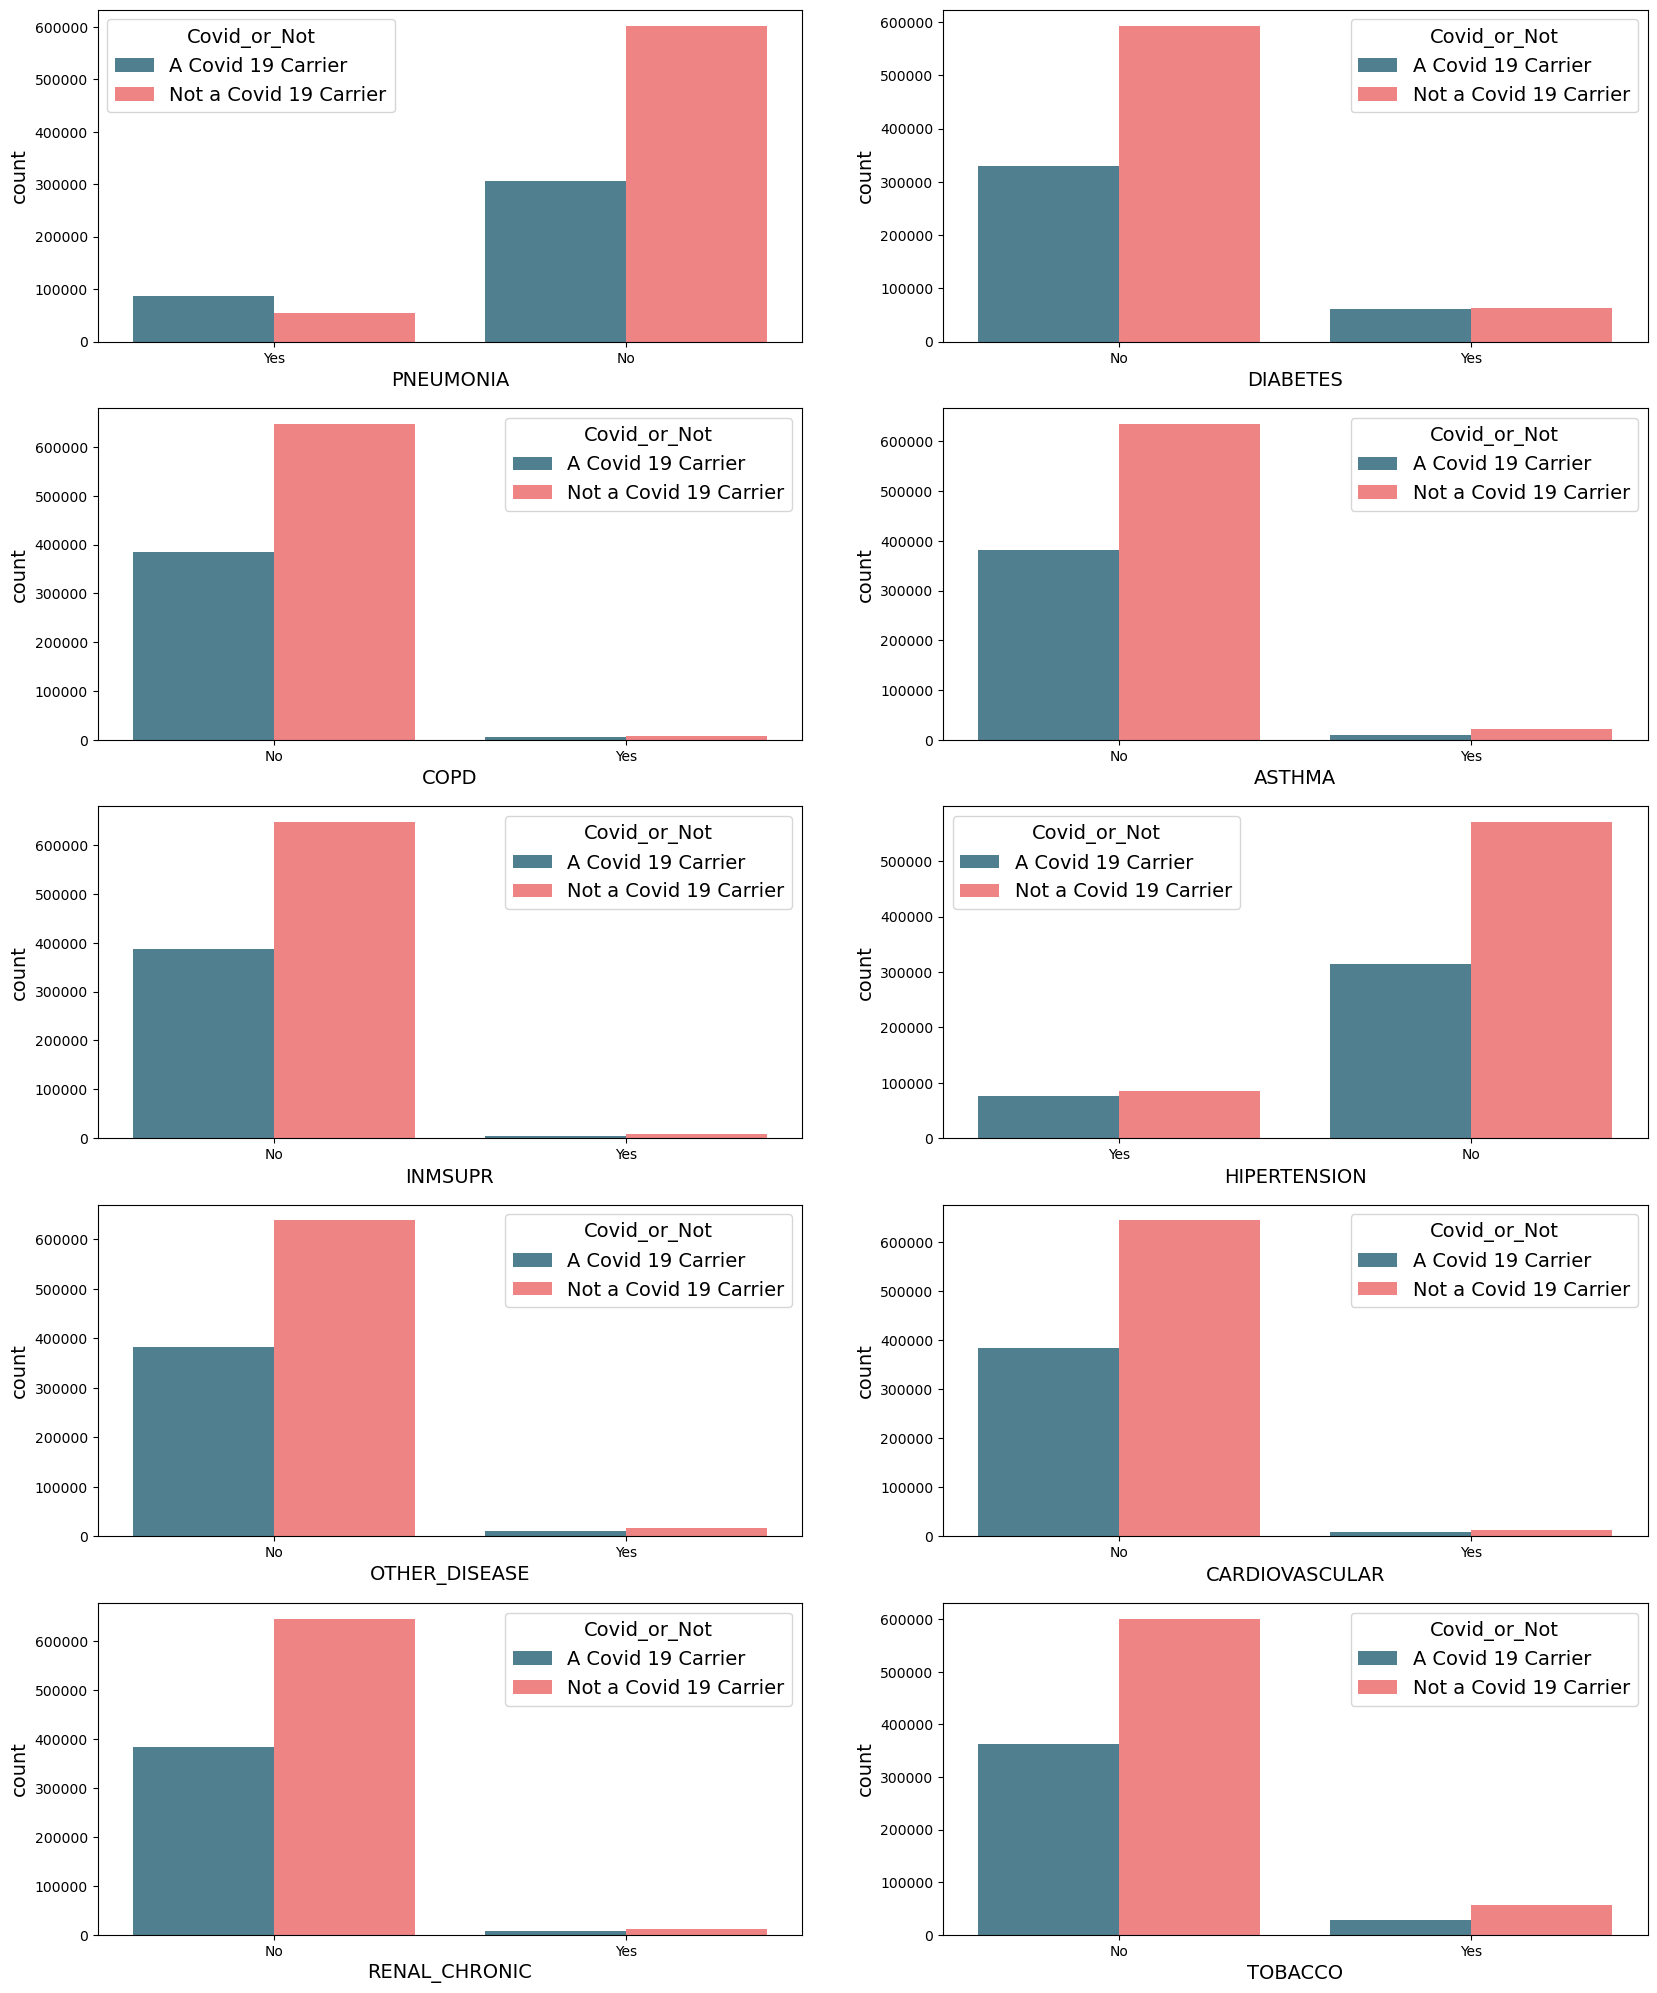

In [69]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    df_diseases[i] = ["Yes" if j==1 else "No" for j in df_diseases[i]]
    sns.countplot(data=df_diseases, x=i, hue=df["Covid_or_Not"], palette = ['#468499', '#ff7373'])
    index += 1
plt.show()

We noticed that the following diseases and habits have the highest impact:

    -1- Pneumonia
    -2- Hypertension
    -3- Diabetes
    -4- Tobacco usage
We also notice that Pneumonia patients are more likely to carry Covid with a higher ratio.

# Let's dig deeper into the 7 classifications:


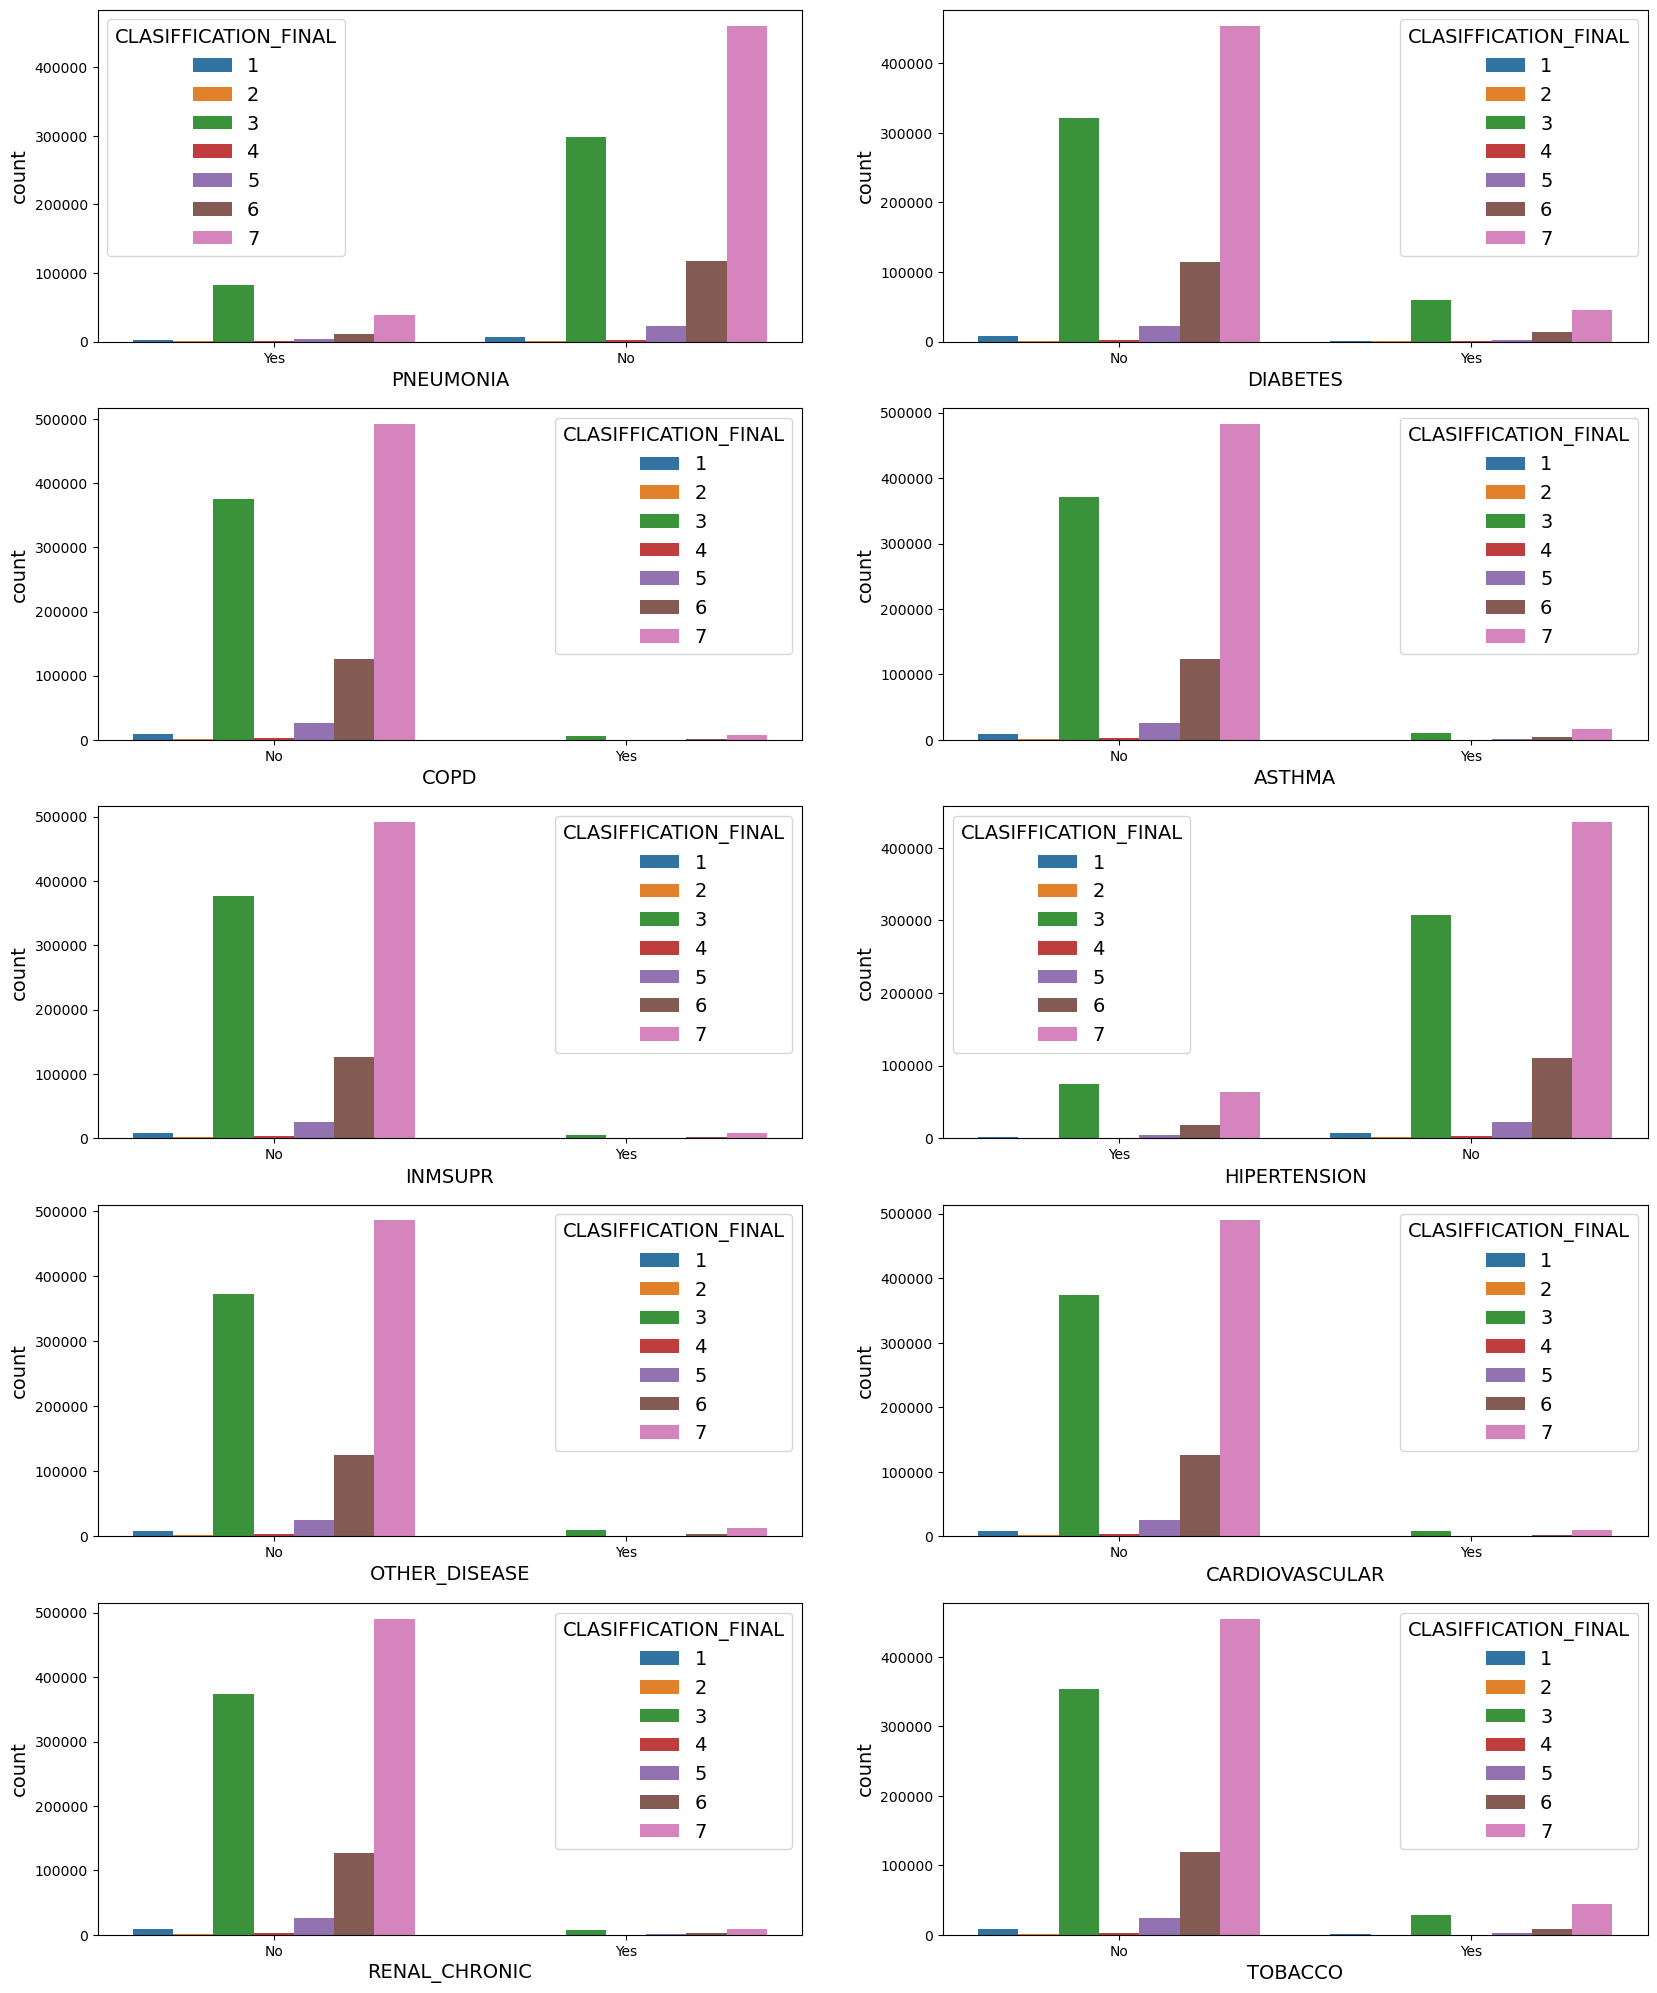

In [70]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    sns.countplot(data=df_diseases, x=i, hue=df['CLASIFFICATION_FINAL'],)

    index += 1
plt.show()

We can see that among all the patients of these diseases who also carry Covid, the 3rd classification is the highest by far.


# Modeling and Results


In [71]:
df_model = df.drop(columns=['DATE_DIED','SEX'])


In [72]:
df_model.dropna().shape


(1019473, 21)

In [73]:
df_model.shape


(1048575, 21)

In [74]:
1048575 - 1019473


29102

In [75]:
29102 / 1048575


0.027753856424194742

We can now remove the missing values as they are considered as a great minority in our data with a maximum of about 0.03%.¶


In [76]:
df_model.dropna(inplace = True)


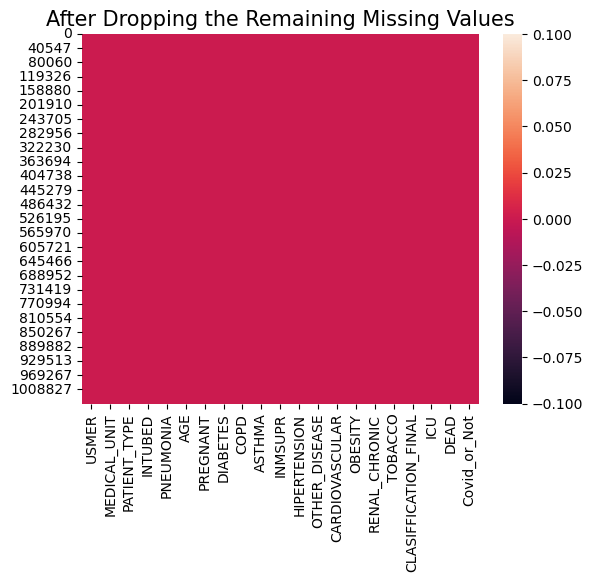

In [79]:
sns.heatmap(df_model.isnull())
plt.title('After Dropping the Remaining Missing Values', color = 'black', fontsize = 15)
plt.show()


In [80]:
df_model.Covid_or_Not.value_counts()


Covid_or_Not
Not a Covid 19 Carrier    633448
A Covid 19 Carrier        386025
Name: count, dtype: int64

In [81]:
df_model.Covid_or_Not = df_model.Covid_or_Not.apply(lambda x: 2 if x=="Not a Covid 19 Carrier" else 1)

# Removing unnecessary features

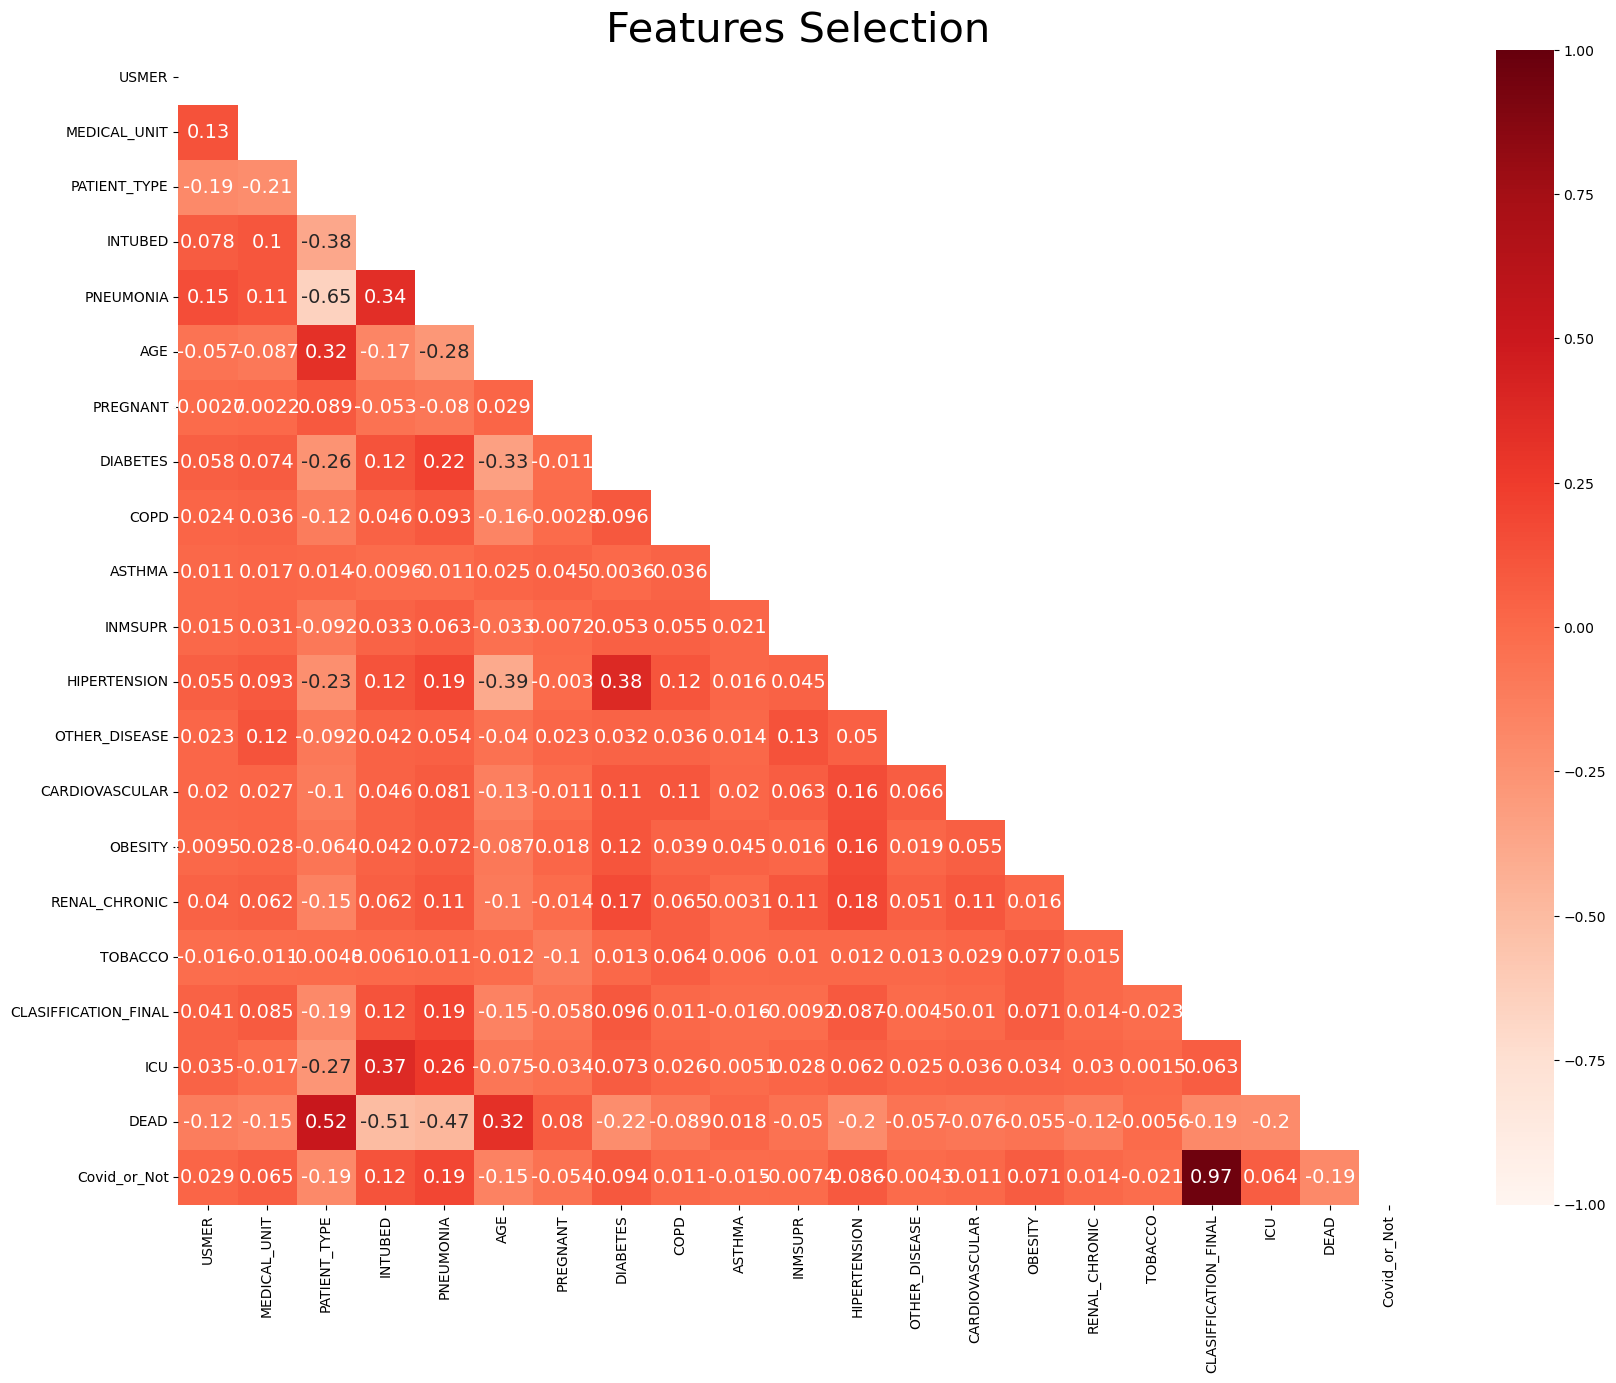

In [82]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df_model.corr()))
sns.heatmap(df_model.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Features Selection', color = 'black', fontsize = 30)
plt.show()

In [83]:
unrelevant_features = ["PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]
df_model.drop(columns=unrelevant_features,inplace=True)

# Data Splitting:


In [84]:
X = df_model.drop('DEAD' , axis= 1)
Y = df_model['DEAD']


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [87]:
x_train

USMER  MEDICAL_UNIT  PATIENT_TYPE  INTUBED  PNEUMONIA   AGE  \
304766       2             4             1      2.0        2.0  10.0   
64146        2             4             1      2.0        2.0  57.0   
1048272      1            13             2      2.0        2.0   1.0   
43133        1             4             2      1.0        1.0  71.0   
257909       2             4             1      2.0        2.0  19.0   
...        ...           ...           ...      ...        ...   ...   
267639       2             4             1      2.0        2.0  33.0   
377469       2             6             1      2.0        2.0  32.0   
133647       2             4             1      2.0        2.0  45.0   
693640       2            12             1      2.0        2.0  43.0   
123655       1             4             1      2.0        2.0  24.0   

         DIABETES  HIPERTENSION  RENAL_CHRONIC  CLASIFFICATION_FINAL  ICU  \
304766        2.0           2.0            2.0                     7  2.0   
64146         2.0           2.0            2.0                     3  2.0   
1048272       2.0           2.0            2.0                     7  2.0   
43133         2.0           1.0            2.0                     3  2.0   
257909        2.0           2.0            2.0                     7  2.0   
...           ...           ...            ...                   ...  ...   
267639        1.0           2.0            2.0                     7  2.0   
377469        2.0           1.0            2.0                     7  2.0   
133647        2.0           1.0            2.0                     3  2.0   
693640        2.0           1.0            2.0                     6  2.0   
123655        2.0           2.0            2.0                     3  2.0   

         Covid_or_Not  
304766              2  
64146               1  
1048272             2  
43133               1  
257909              2  
...               ...  
267639              2  
377469              2  
133647              1  
693640              2  
123655              1  

[713631 rows x 12 columns]

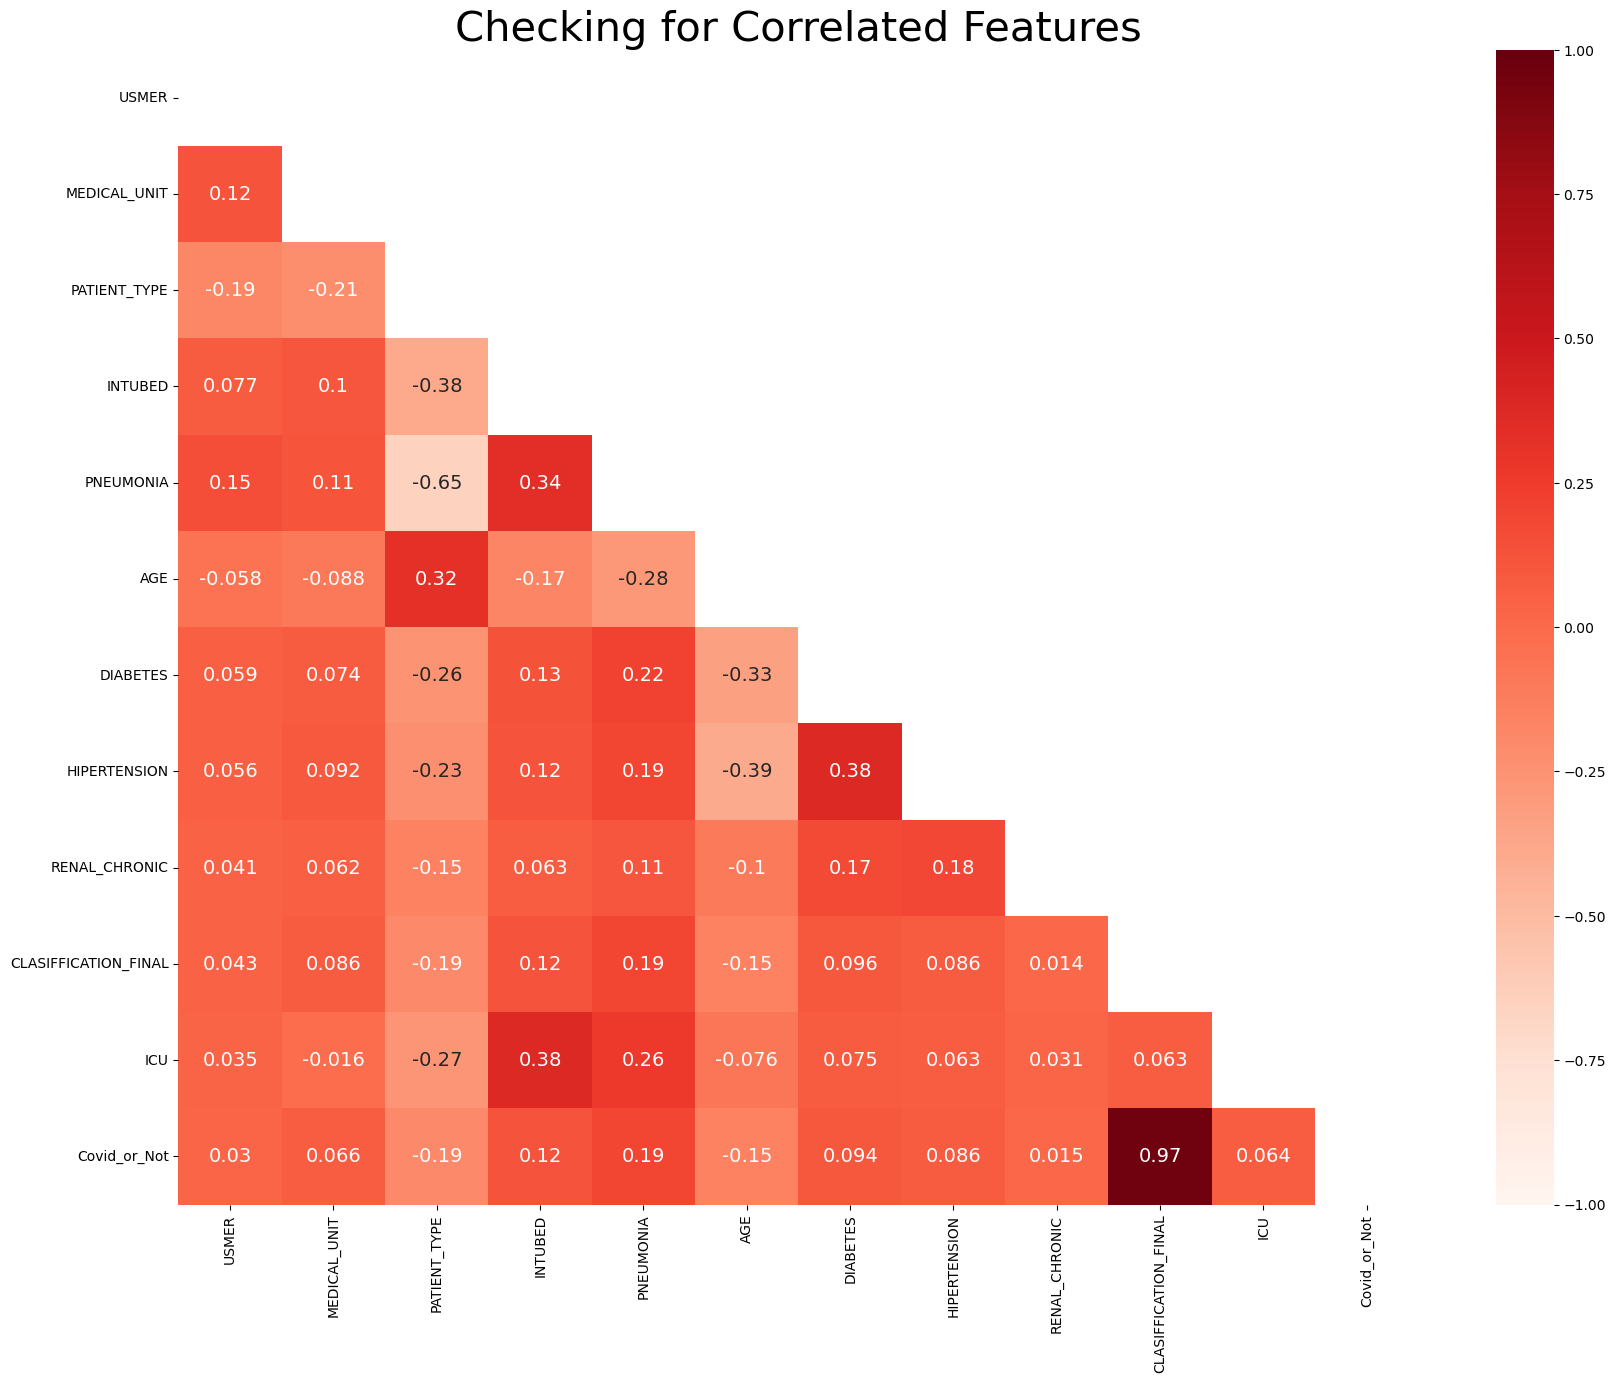

In [88]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(x_train.corr()))
sns.heatmap(x_train.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Checking for Correlated Features', color = 'black', fontsize = 30)
plt.show()

In [89]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [90]:
print(correlation(x_train, 0.7))

{'Covid_or_Not'}


In [91]:
x_train.drop('Covid_or_Not',axis=1, inplace = True)
x_test.drop('Covid_or_Not',axis=1, inplace = True)


# Checking Data for Balance:


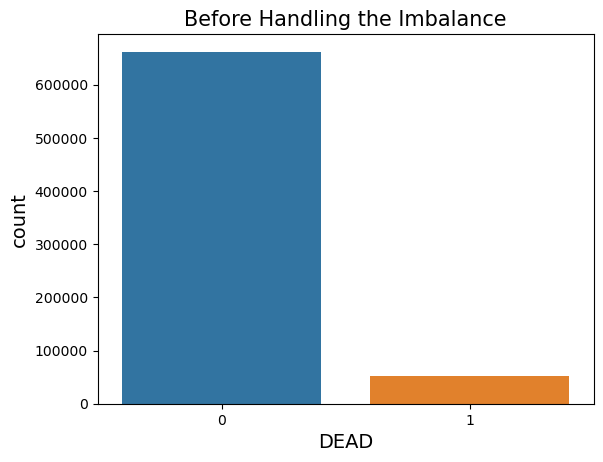

In [92]:
sns.countplot(x = y_train)
plt.title('Before Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()


In [93]:

sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)


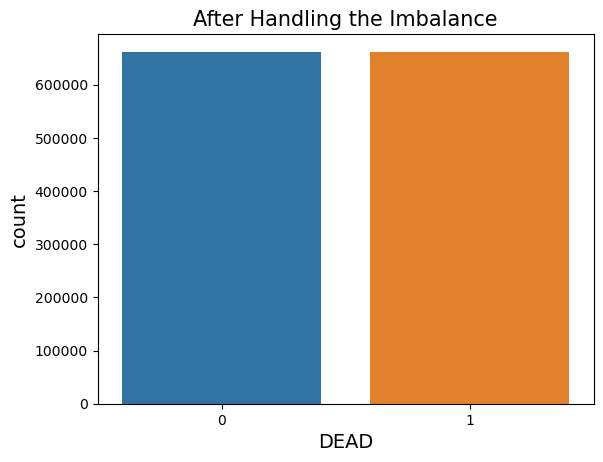

In [94]:
# Let's check our data again:
sns.countplot(x = y_train)
plt.title('After Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()


Important Note

    We should always split into test and train sets BEFORE trying any resampling techniques! so that we can apply our techniques only on the train sets (remember we should never miss with our test sets!!).

    Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets! (Data Leakage). This can allow our model to simply memorize specific data points and cause overfitting.

# Training and Testing¶


### logistic regression

In [95]:
log_reg=LogisticRegression()

In [96]:
log_reg.fit(x_train , y_train)

LogisticRegression()

In [97]:
log_reg.predict_proba(x_train[:3])

array([[0.9896089 , 0.0103911 ],
       [0.77480279, 0.22519721],
       [0.96363401, 0.03636599]])

In [98]:
log_reg_predict = log_reg.predict(x_test)

In [99]:
print("Logistic Regression Train Accuracy: ", log_reg.score(x_train,y_train), "\n")
print("Logistic Regression Test Accuracy: ", log_reg.score(x_test,y_test))

Logistic Regression Train Accuracy:  0.9059241079856523 

Logistic Regression Test Accuracy:  0.8991341934724466


In [100]:
Classes = ['Not Dead', 'Dead']
print("Logistic Regression Classification Report:", "\n", classification_report(y_test, log_reg.predict(x_test), target_names = Classes))


Logistic Regression Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.90      0.94    284090
        Dead       0.41      0.91      0.56     21752

    accuracy                           0.90    305842
   macro avg       0.70      0.91      0.75    305842
weighted avg       0.95      0.90      0.92    305842



### Decision Tree

In [101]:
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train,y_train)
print("Decision Tree Train Accuracy: ", tree_clf.score(x_train,y_train), "\n")
print("Decision Tree Test Accuracy: ", tree_clf.score(x_test,y_test))

Decision Tree Train Accuracy:  0.9526803851236549 

Decision Tree Test Accuracy:  0.9156721444405935


In [102]:
print("Decision Tree Classification Report:", "\n",classification_report(y_test, tree_clf.predict(x_test), target_names = Classes))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.98      0.93      0.95    284090
        Dead       0.45      0.77      0.57     21752

    accuracy                           0.92    305842
   macro avg       0.71      0.85      0.76    305842
weighted avg       0.94      0.92      0.93    305842



### Random Forest


In [138]:
ran_for=RandomForestClassifier( n_jobs=-1 , n_estimators=10,  , random_state=42)
ran_for.fit(x_train,y_train)
print("Random Forest Train Accuracy: ", ran_for.score(x_train,y_train), "\n")
print("Random Forest Forest Test Accuracy: ", ran_for.score(x_test,y_test))


Random Forest Train Accuracy:  0.9517530677742119 

Random Forest Forest Test Accuracy:  0.9153288299187162


In [104]:
print("Random Forest Classification Report:", "\n",classification_report(y_test, ran_for.predict(x_test), target_names = Classes))


Random Forest Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.98      0.93      0.95    284090
        Dead       0.45      0.78      0.57     21752

    accuracy                           0.92    305842
   macro avg       0.71      0.85      0.76    305842
weighted avg       0.94      0.92      0.93    305842



# Gradient boosting

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
gbrt = GradientBoostingClassifier(max_depth=3 ,n_iter_no_change=10,  n_estimators=100 , learning_rate=1.0 , random_state=42)

In [146]:
gbrt.fit(x_train,y_train)
print("gbrt Train Accuracy: ", gbrt.score(x_train,y_train), "\n")
print("gbrt Forest Test Accuracy: ", gbrt.score(x_test,y_test))


gbrt Train Accuracy:  0.9332074759297716 

gbrt Forest Test Accuracy:  0.9098783031761498


In [148]:
print("Gradient boosting Classification Report:", "\n",classification_report(y_test, gbrt.predict(x_test), target_names = Classes))


Gradient boosting Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.91      0.95    284090
        Dead       0.44      0.90      0.59     21752

    accuracy                           0.91    305842
   macro avg       0.71      0.90      0.77    305842
weighted avg       0.95      0.91      0.92    305842



### Naive Bayes


In [105]:
gnb = GaussianNB()
gnb.fit(x_train , y_train)
print("Naive Bayes Train Accuracy: ", gnb.score(x_train,y_train), "\n")
print("Naive Bayes Test Accuracy: ", gnb.score(x_test,y_test))

Naive Bayes Train Accuracy:  0.878579573343402 

Naive Bayes Test Accuracy:  0.9031754958442595


In [106]:
print("Naive Bayes Classification Report:", "\n",classification_report(y_test, gnb.predict(x_test), target_names = Classes))

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.91      0.95    284090
        Dead       0.41      0.86      0.56     21752

    accuracy                           0.90    305842
   macro avg       0.70      0.88      0.75    305842
weighted avg       0.95      0.90      0.92    305842



### XGBoost


In [107]:
XGB = XGBClassifier()
XGB.fit(x_train , y_train)
print("XGBoost Train Accuracy: ", XGB.score(x_train,y_train), "\n")
print("XGBoost Test Accuracy: ", XGB.score(x_test,y_test))

XGBoost Train Accuracy:  0.9363926750991127 

XGBoost Test Accuracy:  0.9089268315012327


In [108]:
print("XGBoost Classification Report:", "\n",classification_report(y_test, XGB.predict(x_test), target_names = Classes))

XGBoost Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.91      0.95    284090
        Dead       0.43      0.90      0.58     21752

    accuracy                           0.91    305842
   macro avg       0.71      0.90      0.77    305842
weighted avg       0.95      0.91      0.92    305842



# VotingClassifier

In [152]:
from sklearn.ensemble import VotingClassifier

In [162]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', ran_for), ("DT" , tree_clf)],
    voting='hard')


In [163]:
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_samples=1000000,
                                                     n_estimators=10, n_jobs=-1,
                                                     random_state=42)),
                             ('DT', DecisionTreeClassifier(random_state=42))])

In [164]:
from sklearn.metrics import accuracy_score

for clf in (log_reg, ran_for, tree_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.8991341934724466
RandomForestClassifier 0.9153288299187162
DecisionTreeClassifier 0.9156721444405935
VotingClassifier 0.9153059422839244


In [165]:
print("voting_clf Train Accuracy: ", voting_clf.score(x_train,y_train), "\n")
print("voting_clf Test Accuracy: ", voting_clf.score(x_test,y_test))

voting_clf Train Accuracy:  0.9520747592977157 

voting_clf Test Accuracy:  0.9153059422839244


In [166]:
print("voting Classifier Classification Report:", "\n",classification_report(y_test, voting_clf.predict(x_test), target_names = Classes))

voting Classifier Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.98      0.92      0.95    284090
        Dead       0.45      0.80      0.57     21752

    accuracy                           0.92    305842
   macro avg       0.72      0.86      0.76    305842
weighted avg       0.95      0.92      0.93    305842



 "Support Vector Machine" and the "K-Nearest Neighbors" algorithms, they will took like forever to run, and that can be expected due to the huge size of our data.


In [167]:
import pandas as pd

data = {
    "ALGORITHM": ["LOGISTIC REGRESSION", "DECISION TREE", "RANDOM FOREST", "XGBOOST", "NAIVE BAYES","GBOOSTING" , "VOTING CLASSIFIER"],
    "TRAIN ACCURACY": [
        log_reg.score(x_train, y_train),
        tree_clf.score(x_train, y_train),
        ran_for.score(x_train, y_train),
        XGB.score(x_train, y_train),
        gnb.score(x_train, y_train),
        gbrt.score(x_train, y_train),
        voting_clf.score(x_train, y_train)
    ],
    "TEST ACCURACY": [
        log_reg.score(x_test,y_test),
        tree_clf.score(x_test,y_test),
        ran_for.score(x_test,y_test),
        XGB.score(x_test,y_test),
        gnb.score(x_test,y_test),
        gbrt.score(x_test,y_test),
        voting_clf.score(x_test,y_test)
        
    ]
}

DF = pd.DataFrame(data)


In [168]:
DF.sort_values(by=("TEST ACCURACY") , ascending=False)

ALGORITHM  TRAIN ACCURACY  TEST ACCURACY
1        DECISION TREE        0.952680       0.915672
2        RANDOM FOREST        0.951753       0.915329
6    VOTING CLASSIFIER        0.952075       0.915309
5            GBOOSTING        0.933207       0.909878
3              XGBOOST        0.936393       0.908927
4          NAIVE BAYES        0.878580       0.903175
0  LOGISTIC REGRESSION        0.905924       0.899134

# MODEL EXPLANATION via LIME

In [111]:
import lime 
from lime import lime_tabular

In [112]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(x_train), feature_names=x_train.columns, 
            class_names=['alive(0)', 'Dead(1)'] ,mode='classification')

In [113]:
explanation = lime_explainer.explain_instance(data_row=x_test.iloc[2], predict_fn=ran_for.predict_proba)

# printing out the explanation
explanation.show_in_notebook()

In [114]:
ran_for.predict(x_test.iloc[[2]])

array([0], dtype=int64)

In [115]:
y_test.iloc[2]

0

In [116]:
explanation = lime_explainer.explain_instance(data_row=x_test.iloc[110], predict_fn=ran_for.predict_proba)

# printing out the explanation
explanation.show_in_notebook()

#  MODEL EXPLANATION via SHAP

In [ ]:
import shap 

`note` TreeExplainer because our model is tree like arcitecture

In [ ]:
# tree_explainer = shap.TreeExplainer(ran_for)
# tree_shap_values = tree_explainer.shap_values(X)
